# CAPSTONE -  EDA BLIND WINE TASTING

I concated the two data set:

df1 that contains 34837 rows and 12 columns. This data was scraped from the website https://www.winemag.com/?s=&drink_type=wine&page=1

df2 that contains 131902 rows and 12 columns. This data was download form Kaggle, last actualization was in March 2019. 
The new DataFrame contains 166715 rows and 12 columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('display.max_columns',500)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df1 = pd.read_csv('small_wineV1.csv')
df2 = pd.read_csv('big_wineV1.csv')

In [3]:
vino = result = pd.concat([df1, df2], sort =False)

In [4]:
vino.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,vintage
0,France,"Buxom and heady, this is a delightfully rich, ...",Vieilles Vignes,99,114.0,Châteauneuf-du-Pape,Rhône Valley,Anna Lee C. Iijima,Domaine de la Janasse 2016 Vieilles Vignes Red...,Rhône-style Red Blend,Domaine de la Janasse,2016.0
1,France,"Sultry and silken on the palate, this wine sta...",La Réserve,98,175.0,Châteauneuf-du-Pape,Rhône Valley,Anna Lee C. Iijima,Domaine le Clos du Caillou 2016 La Réserve Red...,Rhône-style Red Blend,Domaine le Clos du Caillou,2016.0
2,Portugal,The wine's fine perfumed black plum fruits giv...,NaN,98,120.0,Port,Port Blend,Roger Voss,Fonseca 2017 Port,Port,Fonseca,2017.0
3,France,"Veins of vanilla, smoke and toast amplify blac...",Hommage à Henry Tacussel,98,80.0,Châteauneuf-du-Pape,Rhône Valley,Anna Lee C. Iijima,Domaine Moulin-Tacussel 2016 Hommage à Henry T...,Grenache,Domaine Moulin-Tacussel,2016.0
4,France,"This juicy, fruit-forward wine drenches the pa...",La Muse,97,88.0,Châteauneuf-du-Pape,Rhône Valley,Anna Lee C. Iijima,Guillaume Gonnet 2016 La Muse Red (Châteauneuf...,Rhône-style Red Blend,Guillaume Gonnet,2016.0


In [5]:
#DUPLICATES 
#duplicates in the dataset
duplicates = vino[ vino.duplicated(subset='description') & vino.duplicated(subset='title') & vino.duplicated(subset='designation') & vino.duplicated(subset='taster_name')]



In [6]:
duplicates

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,vintage
114246,US,"Extremely fruity and relatively light in body,...",Reserve,87,13.0,California,Lodi,Jim Gordon,Rolling Plains 2014 Reserve Zinfandel (Lodi),Zinfandel,Rolling Plains,2014.0
124987,Austria,Ripe yellow pear on the nose is also apparent ...,Bisamberg-Kreuzenstein,88,20.0,Weinviertel,NaN,Anne Krebiehl MW,Schwarzböck 2017 Bisamberg-Kreuzenstein Grüner...,Grüner Veltliner,Schwarzböck,2017.0
127965,Italy,"Aromas of fragrant white flower, wild herb and...",Vento,89,21.0,Southern Italy,Campania,Kerin O’Keefe,Capolino Perlingieri 2015 Vento Greco (Campania),Greco,Capolino Perlingieri,2015.0


In [7]:
vino.drop_duplicates(subset= ['description', 'title', 'designation', 'taster_name'], inplace=True)

In [8]:
vino.shape

(166716, 12)

In [9]:
vino.describe(include='all')

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,vintage
count,166715,166716,120172,166716.000000,166716.000000,166716,145628,143443,166716,166715,166716,159416.000000
unique,44,166677,45152,NaN,NaN,1304,1365,19,151174,804,18582,NaN
top,US,Ripe yellow pear on the nose is also apparent ...,Reserve,NaN,NaN,California,Napa Valley,Roger Voss,\n,Pinot Noir,Wines & Winemakers,NaN
freq,71021,2,2422,NaN,NaN,39580,4598,29417,240,18015,293,NaN
mean,NaN,NaN,NaN,88.689526,36.871877,NaN,NaN,NaN,NaN,NaN,NaN,2012.192496
std,NaN,NaN,NaN,3.059220,45.891959,NaN,NaN,NaN,NaN,NaN,NaN,13.206610
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1010.000000
25%,NaN,NaN,NaN,87.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000
50%,NaN,NaN,NaN,89.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000
75%,NaN,NaN,NaN,91.000000,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000


In [10]:
# I will replace Boal to Bual. There are the same variety. Boal is the name of the grape in Portugues
vino.variety = vino.variety.apply(lambda x: str(x).replace('Boal', 'Bual'))

## Variety, Province and Country

In [11]:
print("There are {} types of grapes(varieties) in this dataset such as {}... \n".
      format(len(vino.variety.unique()), ", ".join(vino.variety.unique()[0:5])))
print("There are {} provinces producing wine in this dataset such as {}... \n".
      format(len(vino.province.unique()), ", ".join(vino.province.unique()[0:5])))
print("There are {} countries producing wine in this dataset such as {}... \n".
      format(len(vino.country.unique()), ", ".join(vino.country.unique()[0:5]))) 
print("There are {} winery producing wine in this dataset such as {}... \n".
      format(len(vino.winery.unique()), ", ".join(vino.winery.unique()[0:5])))

There are 804 types of grapes(varieties) in this dataset such as Rhône-style Red Blend, Port, Grenache, Grenache-Mourvèdre, Champagne Blend... 

There are 1304 provinces producing wine in this dataset such as Châteauneuf-du-Pape, Port, Champagne, Trento, Santa Maria Valley... 

There are 45 countries producing wine in this dataset such as France, Portugal, Italy, US, Chile... 

There are 18582 winery producing wine in this dataset such as Domaine de la Janasse, Domaine le Clos du Caillou, Fonseca, Domaine Moulin-Tacussel, Guillaume Gonnet... 



The plots below show the fifth first variety, province and country with more wines in the big dataset

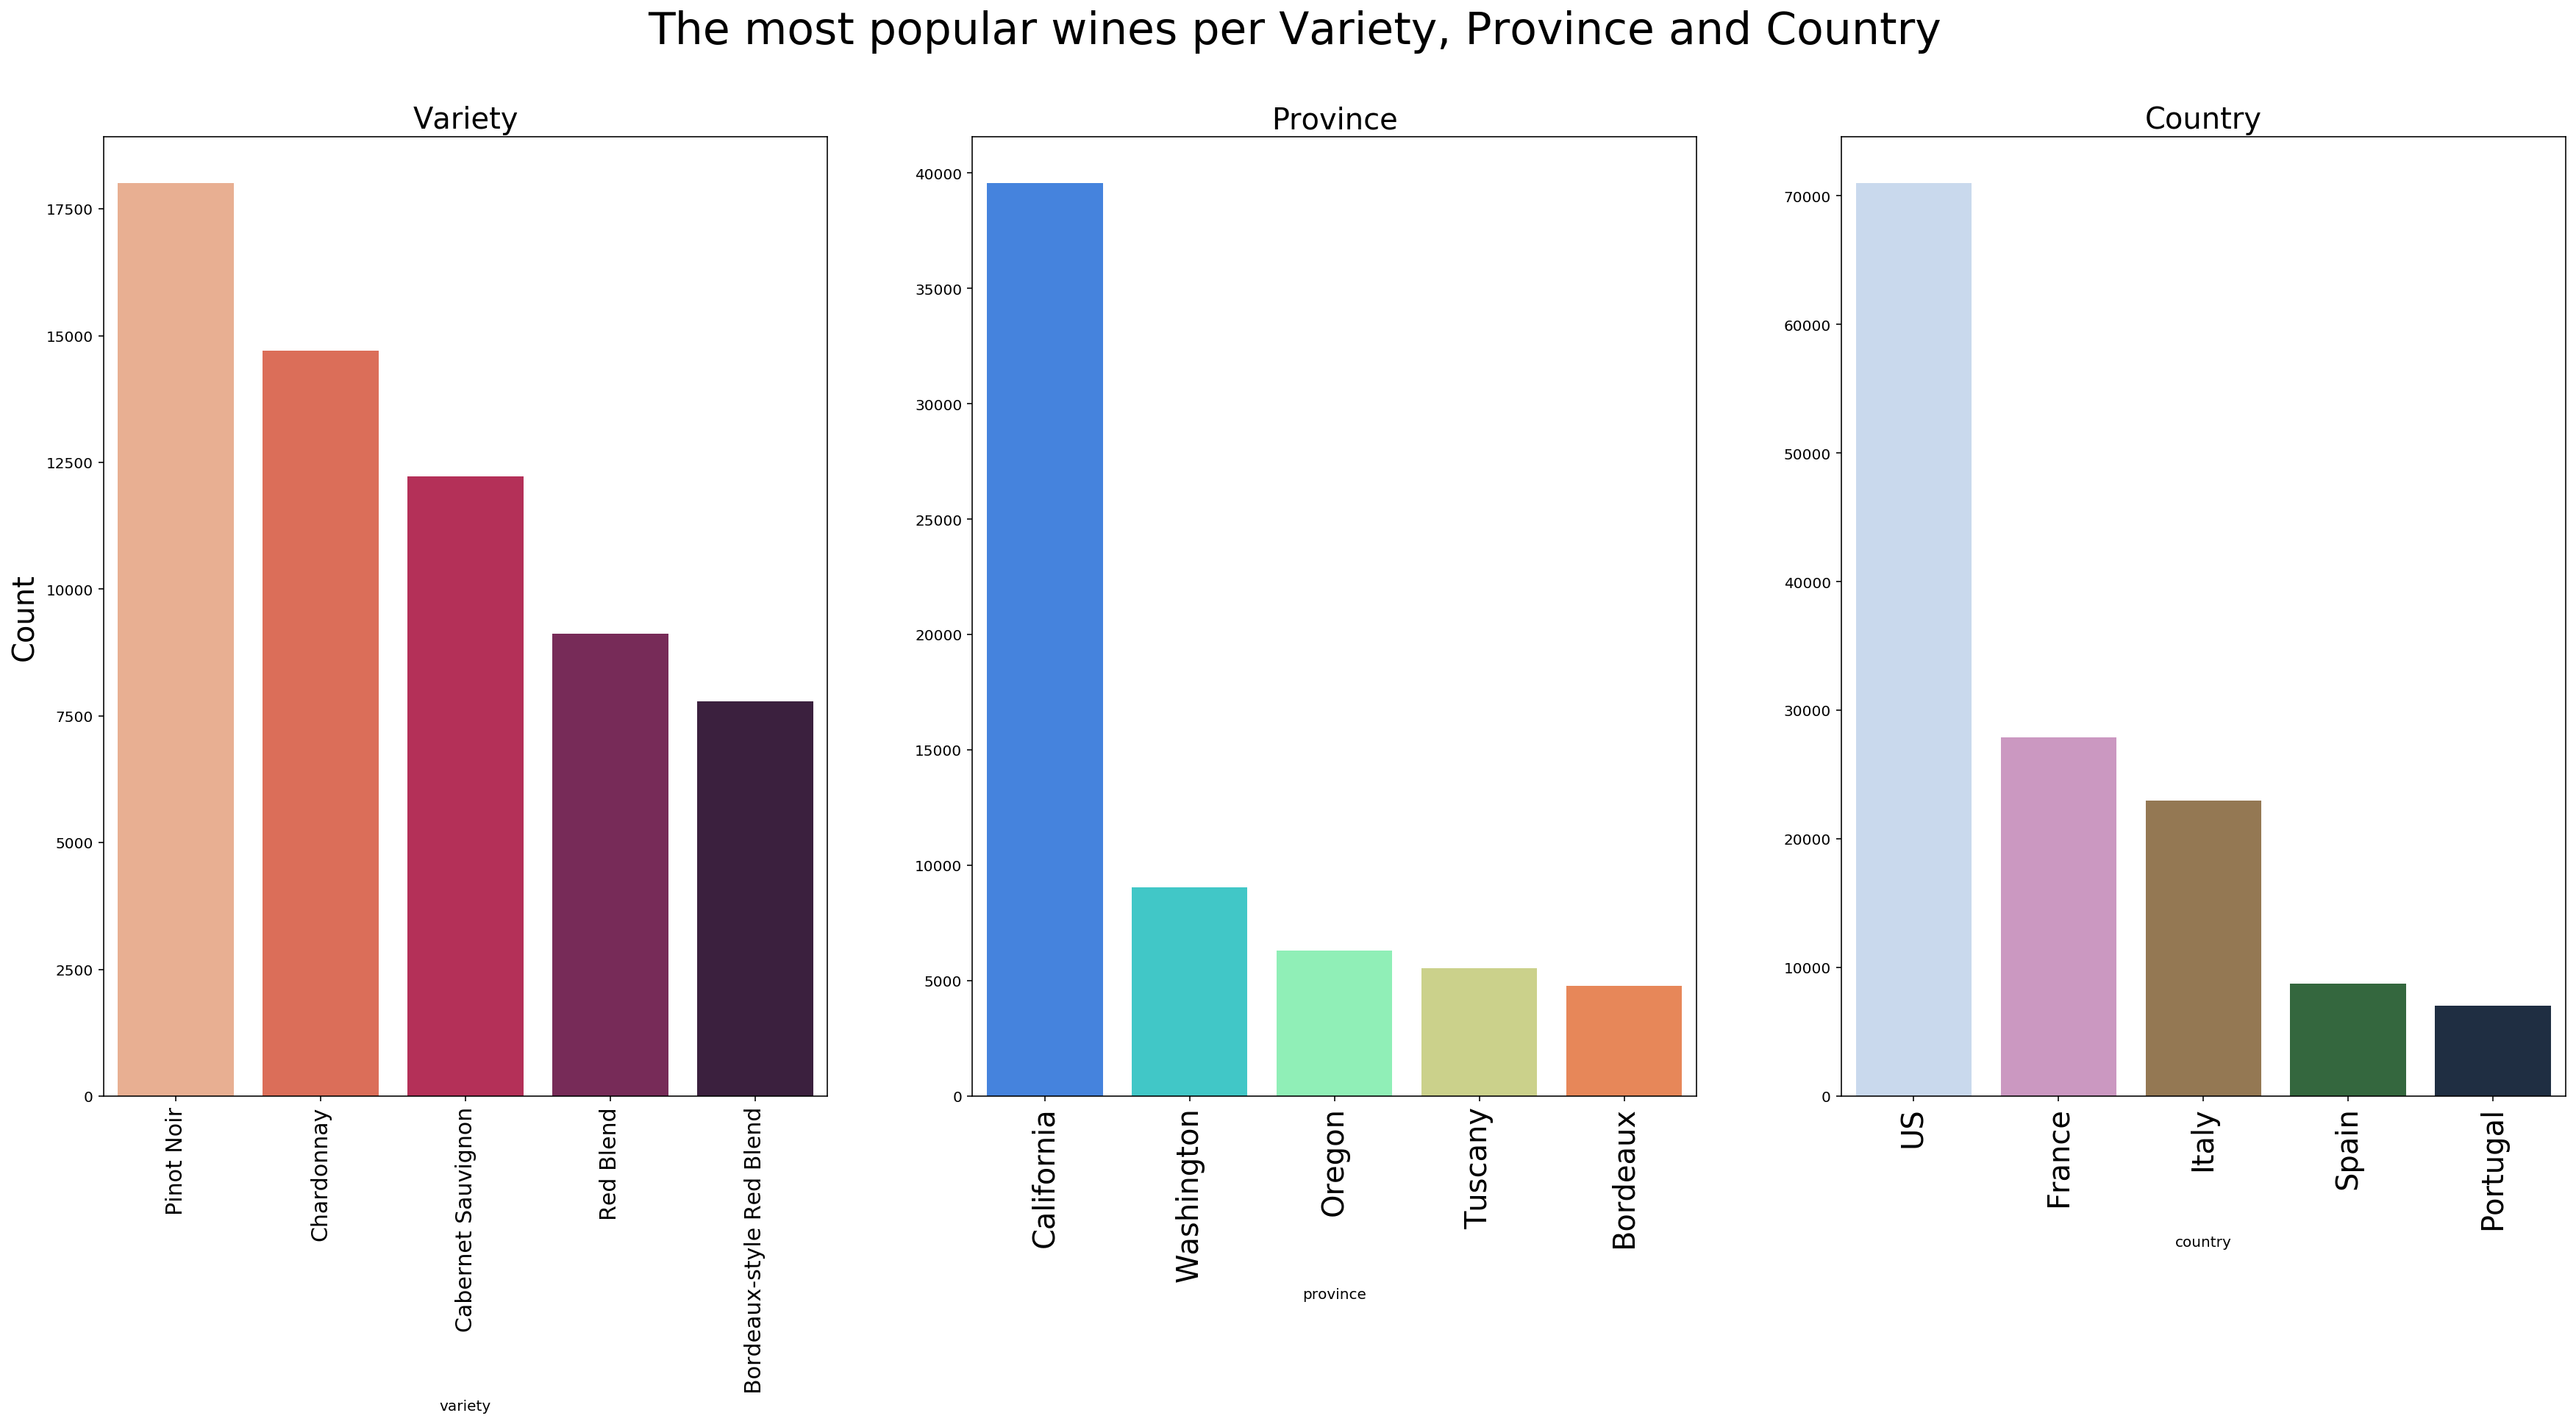

In [12]:
fig, ax = plt.subplots(1, 3, figsize=[30,12])
fig.suptitle("The most popular wines per Variety, Province and Country", fontsize=30)
sns.countplot('variety',data=vino, ax=ax[0],palette='rocket_r', order=pd.value_counts(vino['variety']).iloc[:5].index)
sns.countplot('province',data=vino, ax = ax[1], palette='rainbow', order=pd.value_counts(vino['province']).iloc[:5].index)
sns.countplot('country',data=vino, ax=ax[2], palette='cubehelix_r',order=pd.value_counts(vino['country']).iloc[:5].index)
ax[0].set_title('Variety', fontsize=20)
ax[1].set_title('Province', fontsize=20)
ax[2].set_title('Country', fontsize=20)
ax[0].set_ylabel('Count', fontsize=20)
ax[2].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_xticklabels(pd.value_counts(vino['variety']).iloc[:5].index, rotation=90, fontsize =15)
ax[1].set_xticklabels(pd.value_counts(vino['province']).iloc[:5].index, rotation=90, fontsize =20)
ax[2].set_xticklabels(pd.value_counts(vino['country']).iloc[:5].index, rotation=90, fontsize =20)
plt.show()

The results are similar that we obtain from the small dataset. Most of the wines are from US, more of 55.000 types of wine in this dataset. France (very famous for its wine) has around 20000 types of wine, folow for Italy (famous also for the quality of its wine), with around 18000 types of wine. Pinot Noir, Chardonay and Cabernet Sauvignon are the varieties that there are more in the dataset. They are in the world of the wine very common. These results do not surprise me because the data is from a US website

## Distribution of the Wine Prices and Points

- There is a huge difference between the wine prices from \\$4 to \\$5000.
- The mean is \\$36.2100 higher if we compare with the 50% value \\$26 
- There are many outliers in the data because of the presence of some expensive wines in France wineries.

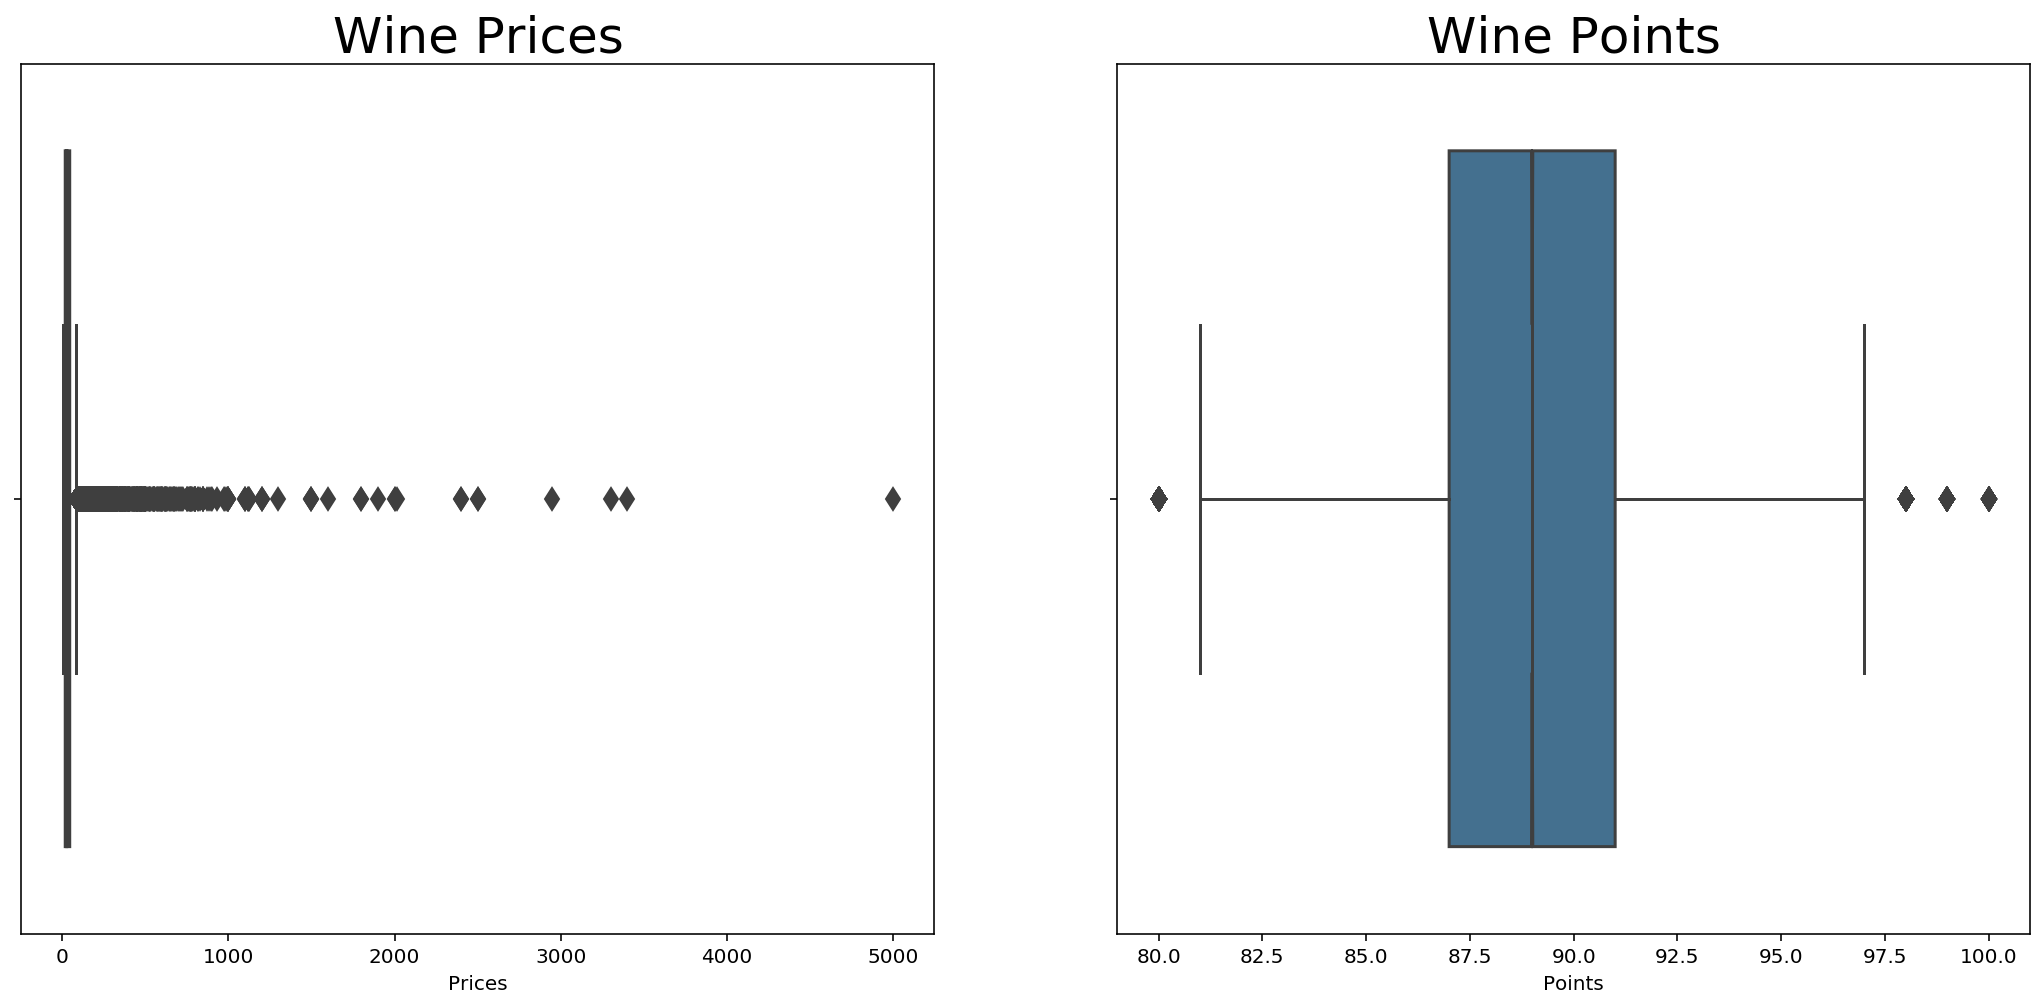

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.boxplot(x = 'price', data=vino, orient='h',
            fliersize=8, linewidth=1.5, notch=True,
            saturation=0.5, ax=ax[0])
sns.boxplot(x='points', data=vino, orient='h',
            fliersize=8, linewidth=1.5, notch=True,
            saturation=0.5, ax=ax[1])
ax[0].set_title('Wine Prices', fontsize=25)
ax[1].set_title('Wine Points', fontsize=25)
ax[0].set_xlabel('Prices')
ax[1].set_xlabel('Points')



plt.show()

In [14]:
price_500 = vino[vino["price"]<500].price.value_counts()
df1v = pd.DataFrame({'price': price_500.index,'number of wines': price_500.values})

In [15]:
point = vino.points.value_counts()
df2v = pd.DataFrame({'points': point.index, 'number of points':point.values})

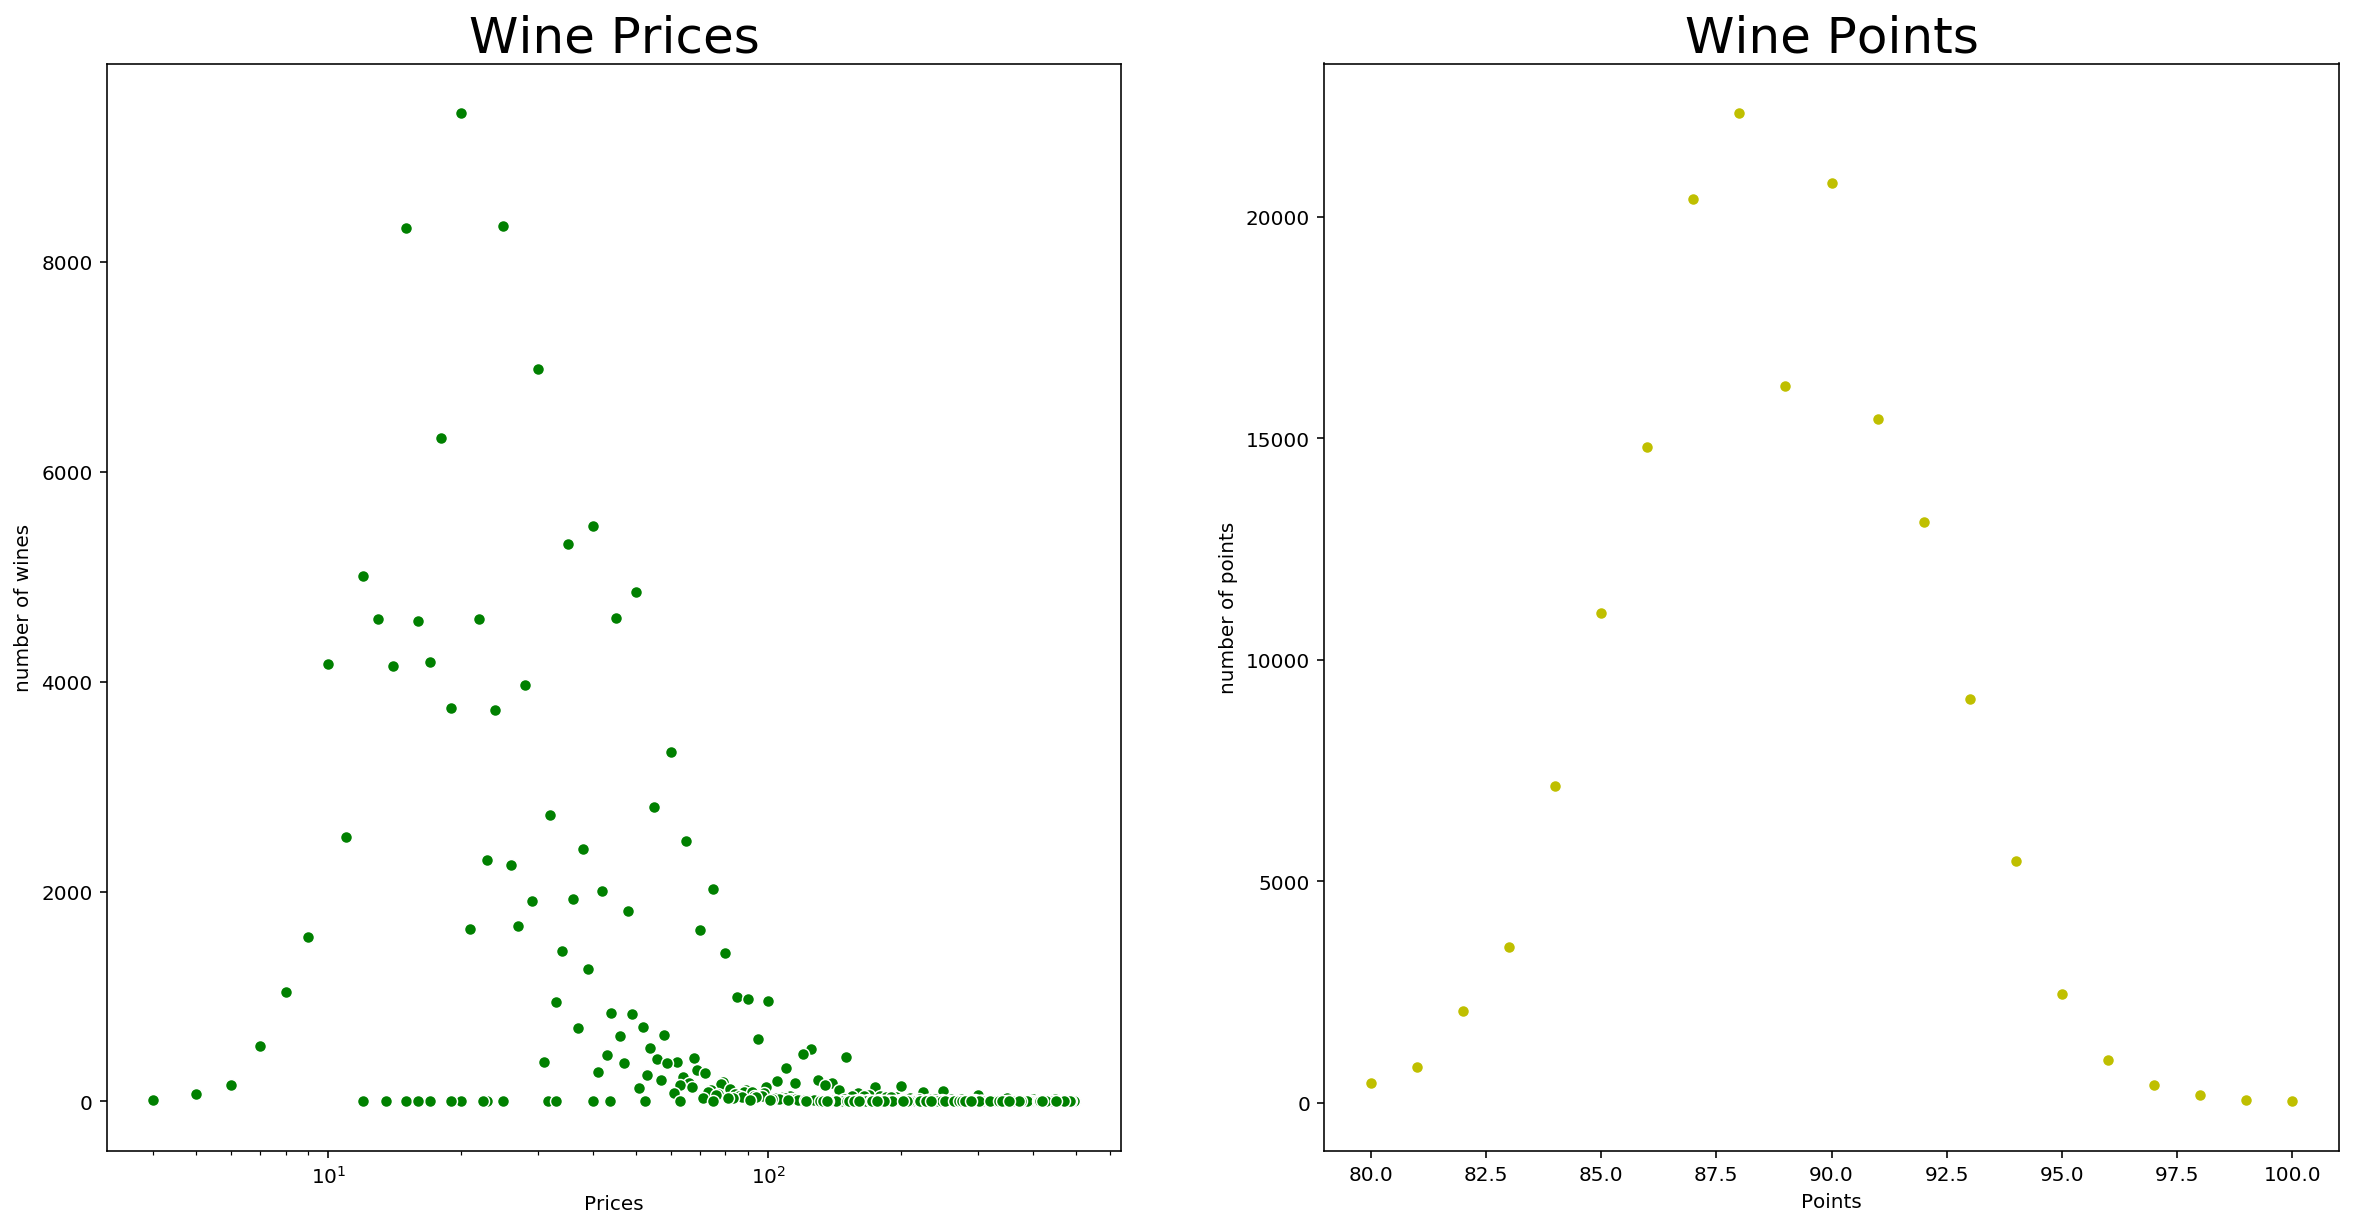

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.scatterplot(x = 'price', y='number of wines', data=df1v, color='g', ax=ax[0])
sns.scatterplot(x = 'points', y='number of points', data=df2v, color='y', ax=ax[1])
ax[0].set_title('Wine Prices', fontsize=25)
ax[1].set_title('Wine Points', fontsize=25)
ax[0].set_xscale('log')
ax[0].set_xlabel('Prices')
ax[1].set_xlabel('Points')
plt.show()

## Relation between Points and Prices

- There is a positive relationship between the points in the reviews and the prices of the wines.

In [17]:
vino[['points', 'price']].corr()

,points,price
points,1.000000,0.394635
price,0.394635,1.000000


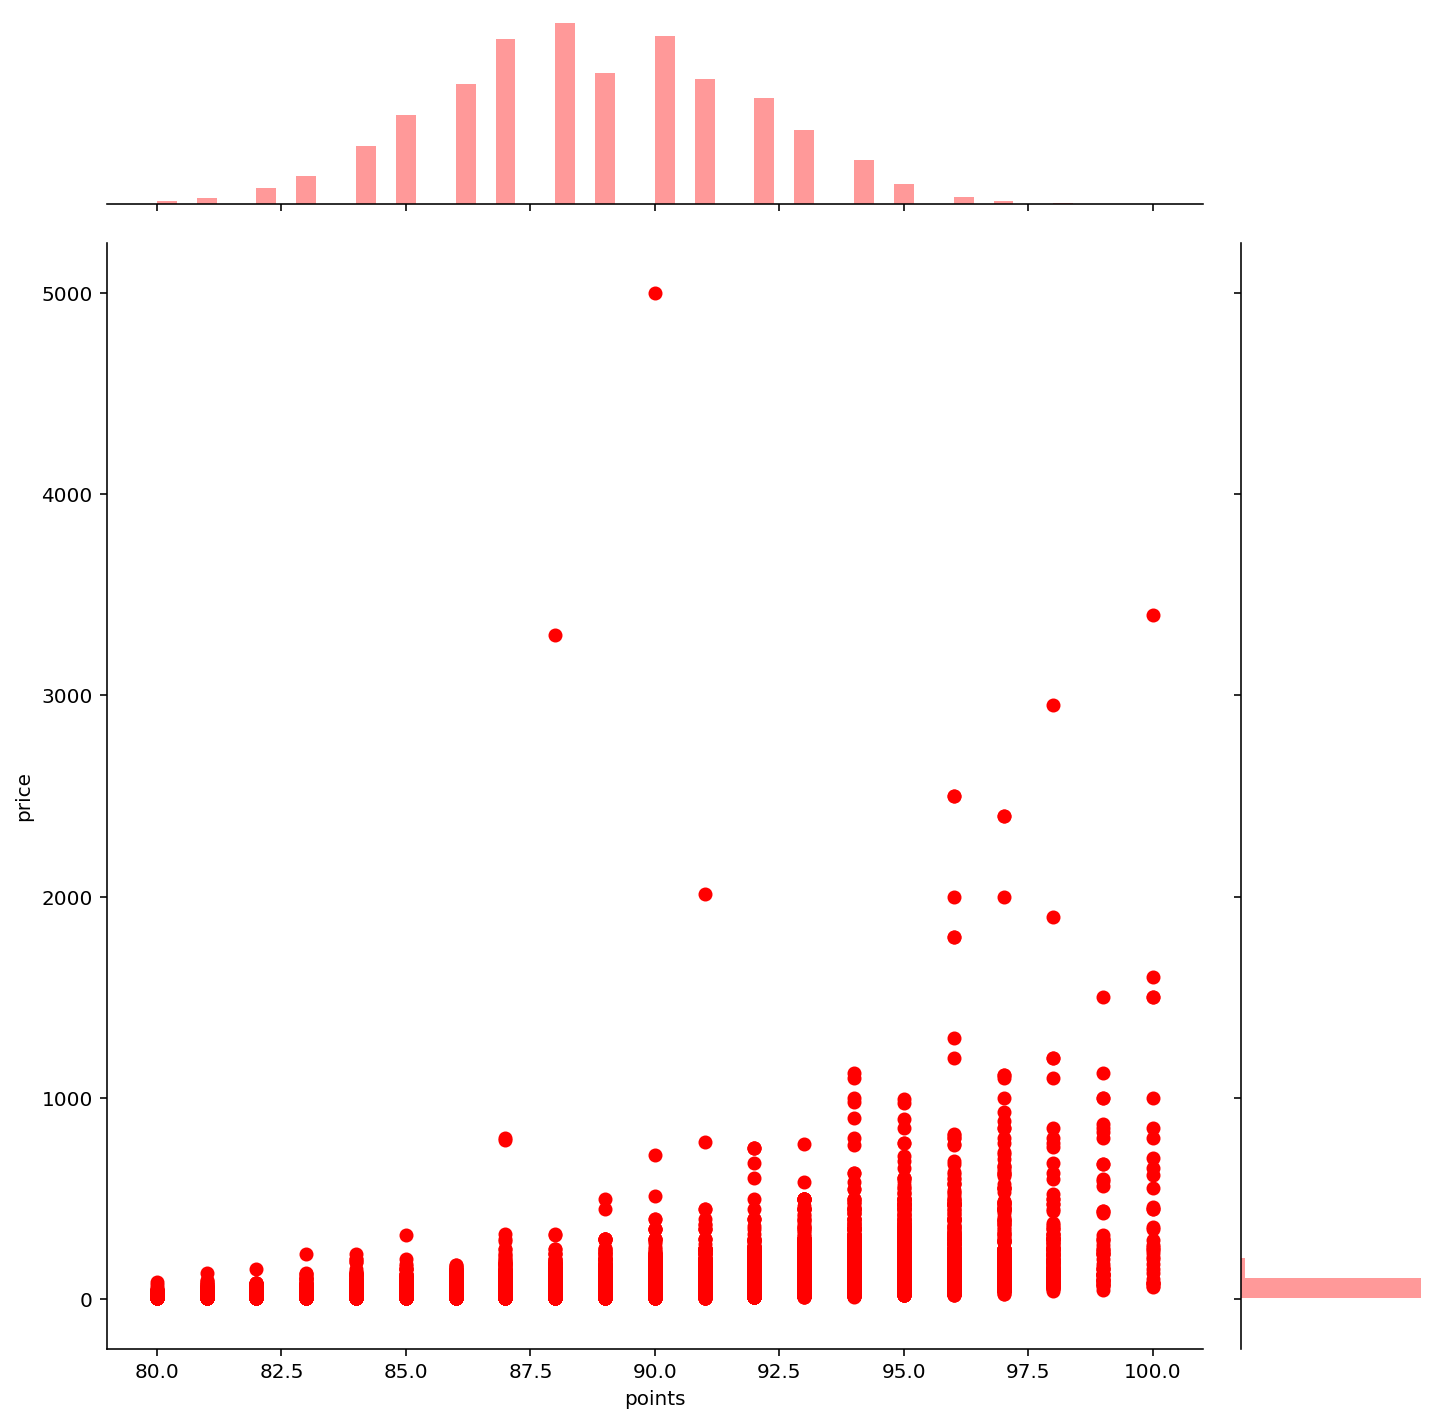

In [18]:
ax = sns.jointplot(x= "points", y="price", data=vino, color='r', height=10);

- Most of the price's wines are between 0 and \\$150 with some outliers data extending to 5000.
- Most of the points reviews are around 80 and 100.
- Below its the association between the points and the wines which price is below of \\$150. 
- Price between \\$4 to \\$20 have points between 80 and 92. Prices from \\$80 have mostly points between 87 and 97.5 with a few values of 100. 

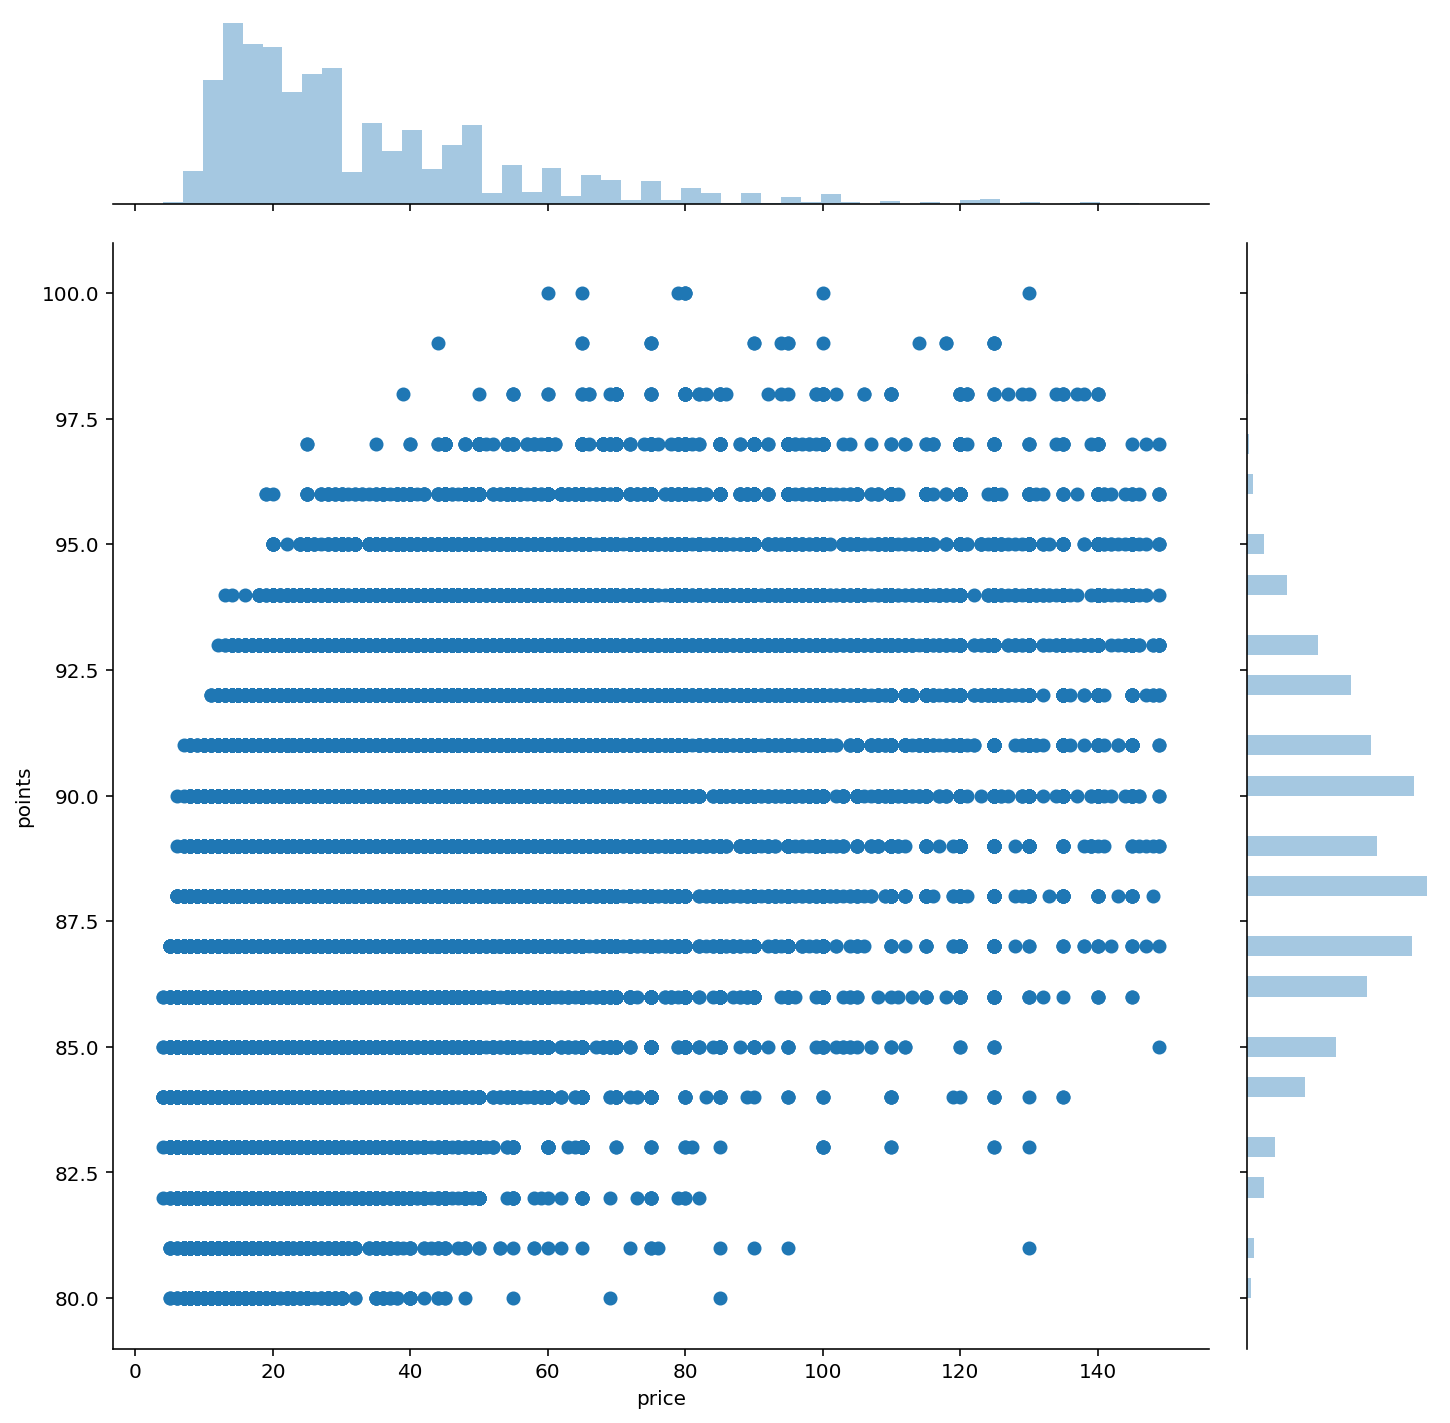

In [19]:
price_150= vino[vino['price']<150]
sns.jointplot(x="price", y="points", data=price_150, height=10)
plt.show()

## Relation between Variety and Prices and Points

- Terrantez and Bual are original from Portugal, Gelber Traminer is original from Austria, they are the varieties with the highest average of points in the wines. The highest points are for the wines made form common varieties, like Cabernet Sauvignon, Shiraz, Merlot...
- Ramisco (from Portugal) is the variety with highest average of prices in the wines. The most expensive wine es made from Bordeaux style red blend. This variety combines two or more of the classic Bordeaux varieties: Cabernet Sauvignon, Merlot, Cabernet Franc, Petit Verdot, Carmenère and Malbec.
- The mix of Malagouzia (from Greece) and Chardonnay (from France) are the varieties with highest average of quality/prices in the wines.

### Average

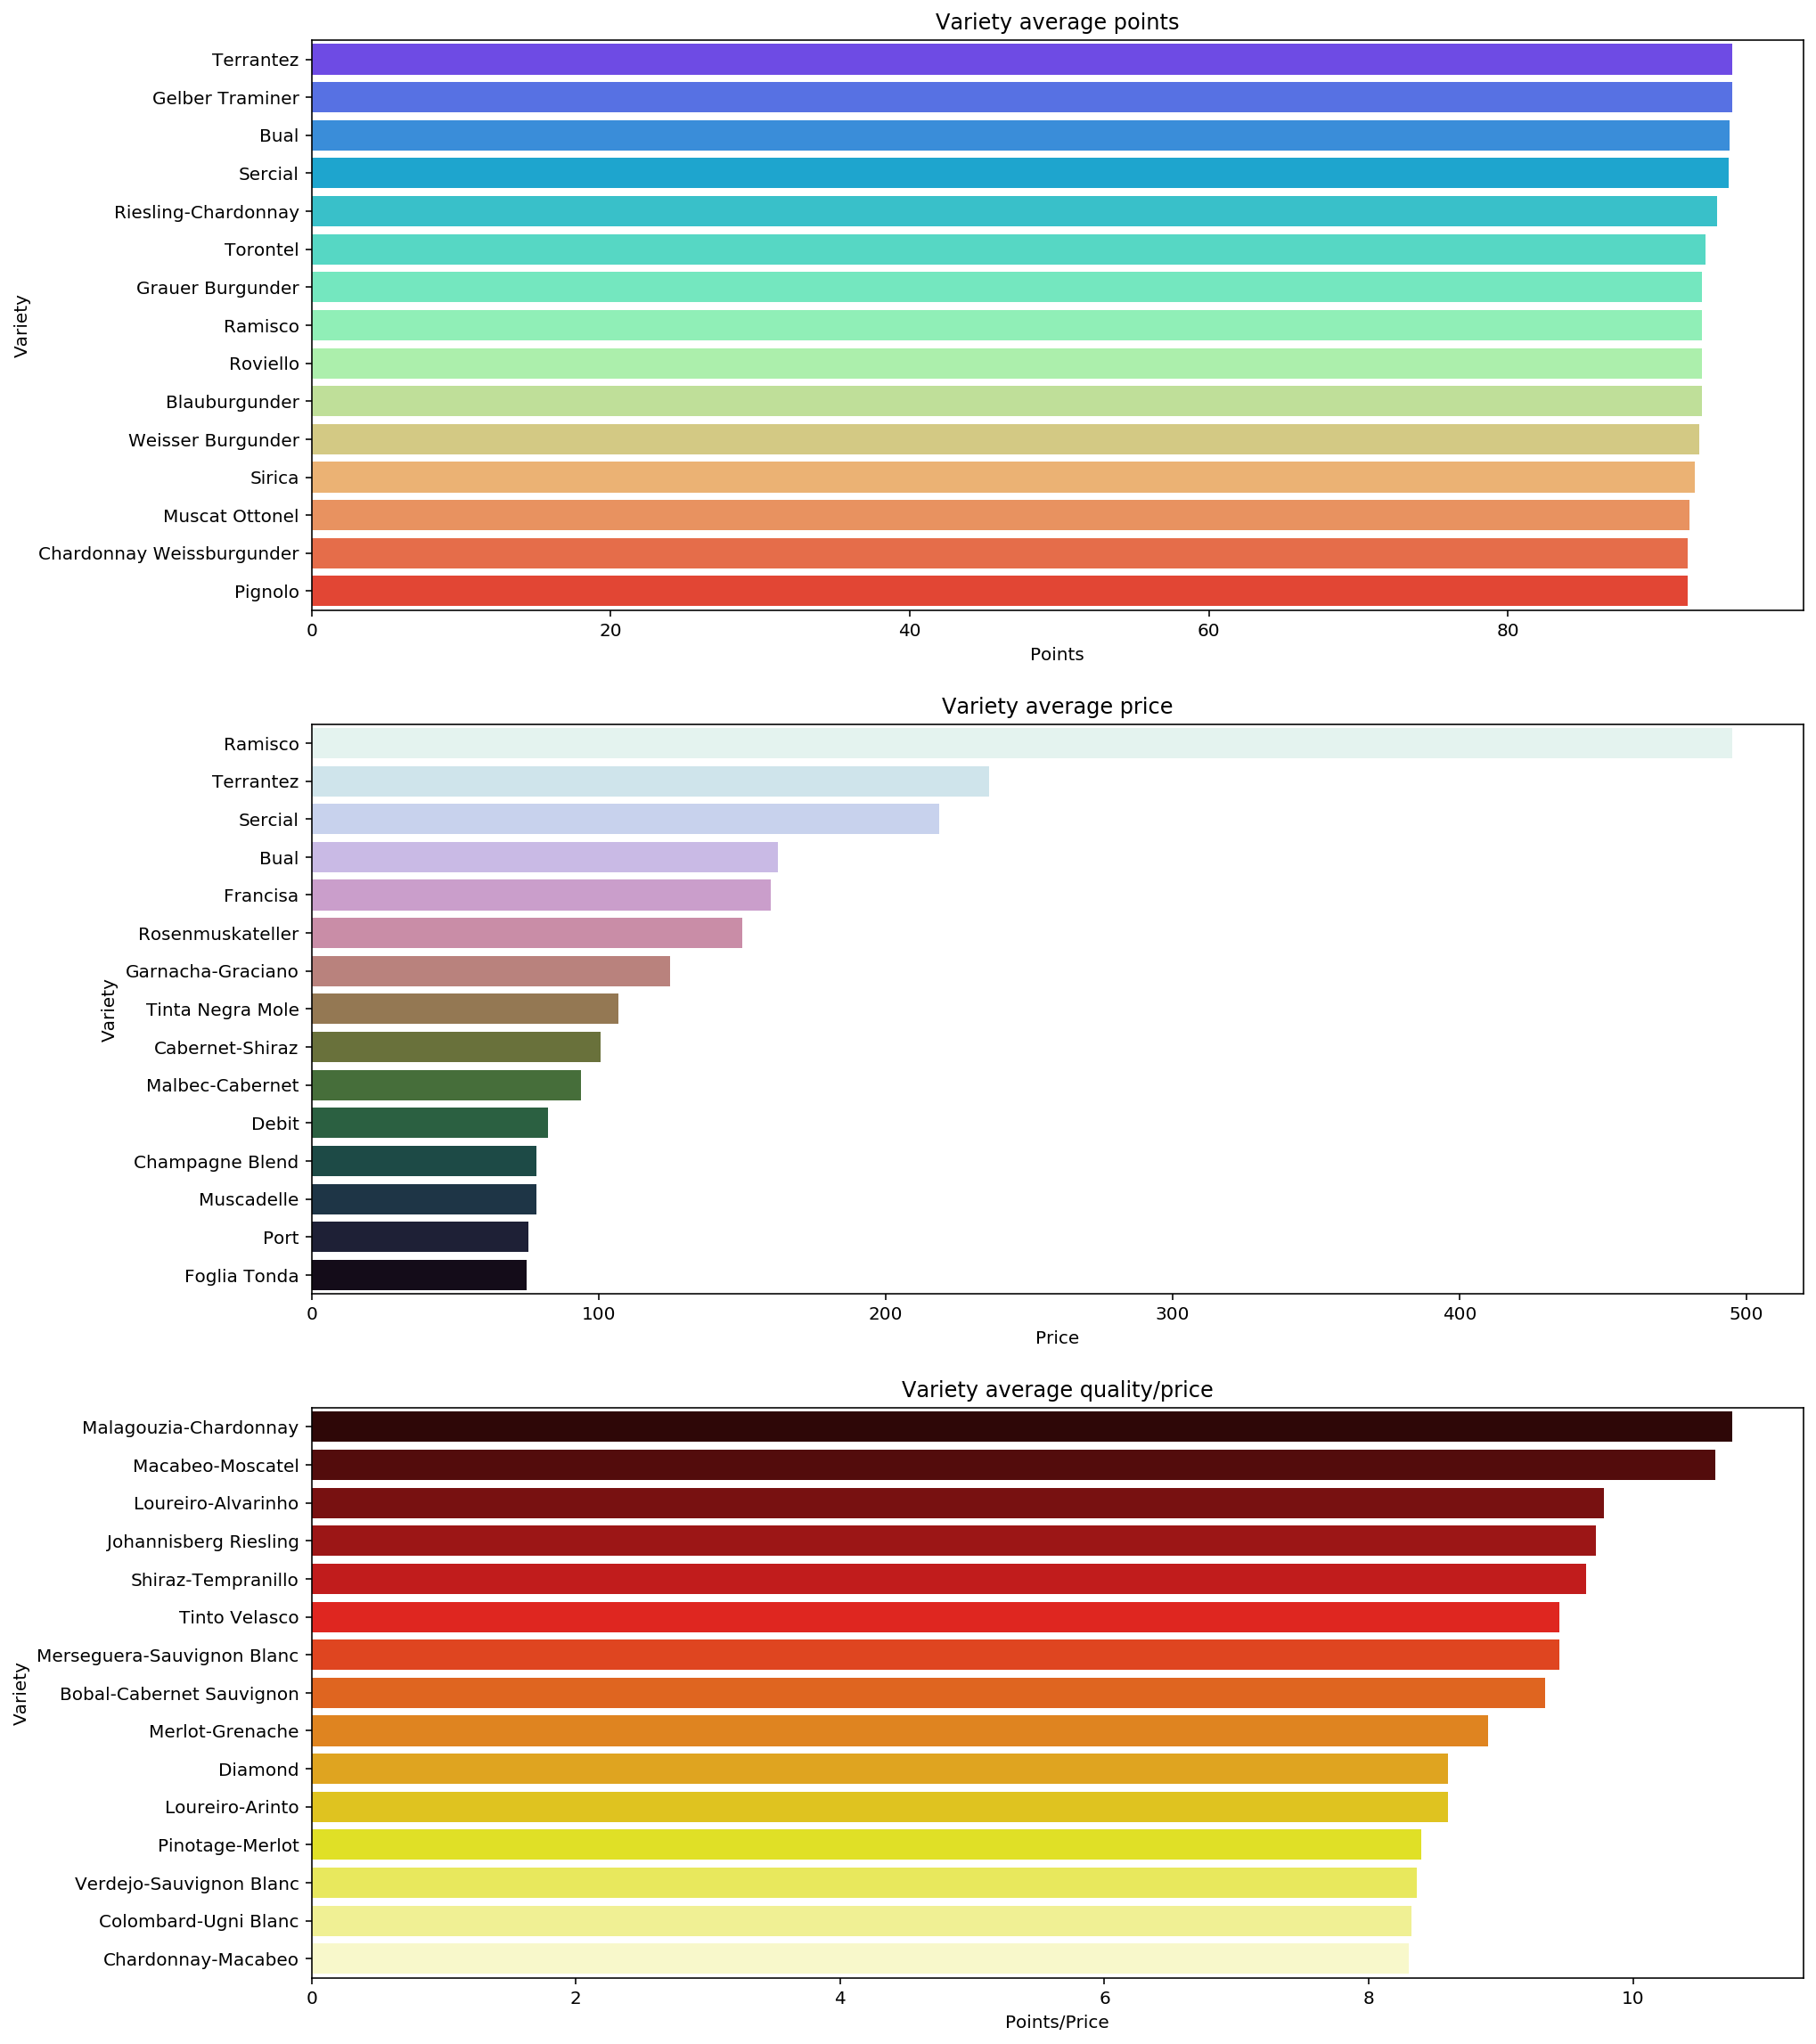

In [20]:
vino_variety_points = vino.groupby('variety').mean().sort_values(by='points', ascending = False)[:15]
vino_variety_price = vino.groupby('variety').mean().sort_values(by='price', ascending = False)[:15]
vino_variety = vino.groupby('variety').mean()
vino_variety['points/price'] = (vino_variety.points / vino_variety.price)
vino_variety = vino_variety.sort_values(by='points/price',ascending = False)[:15]

fig,ax = plt.subplots(3,1, figsize=(15,20))

sns.barplot(x = vino_variety_points['points'], y = vino_variety_points.index, palette= 'rainbow', ax=ax[0])
sns.barplot(x = vino_variety_price['price'], y = vino_variety_price.index, palette= 'cubehelix_r', ax=ax[1])
sns.barplot(x = vino_variety['points/price'], y = vino_variety.index, palette= 'hot', ax=ax[2])

ax[0].set_title('Variety average points')
ax[0].set_ylabel('Variety')
ax[0].set_xlabel('Points')
ax[1].set_title('Variety average price')
ax[1].set_ylabel('Variety')
ax[1].set_xlabel('Price')
ax[2].set_title('Variety average quality/price')
ax[2].set_ylabel('Variety')
ax[2].set_xlabel('Points/Price')
plt.show()

### Maximum

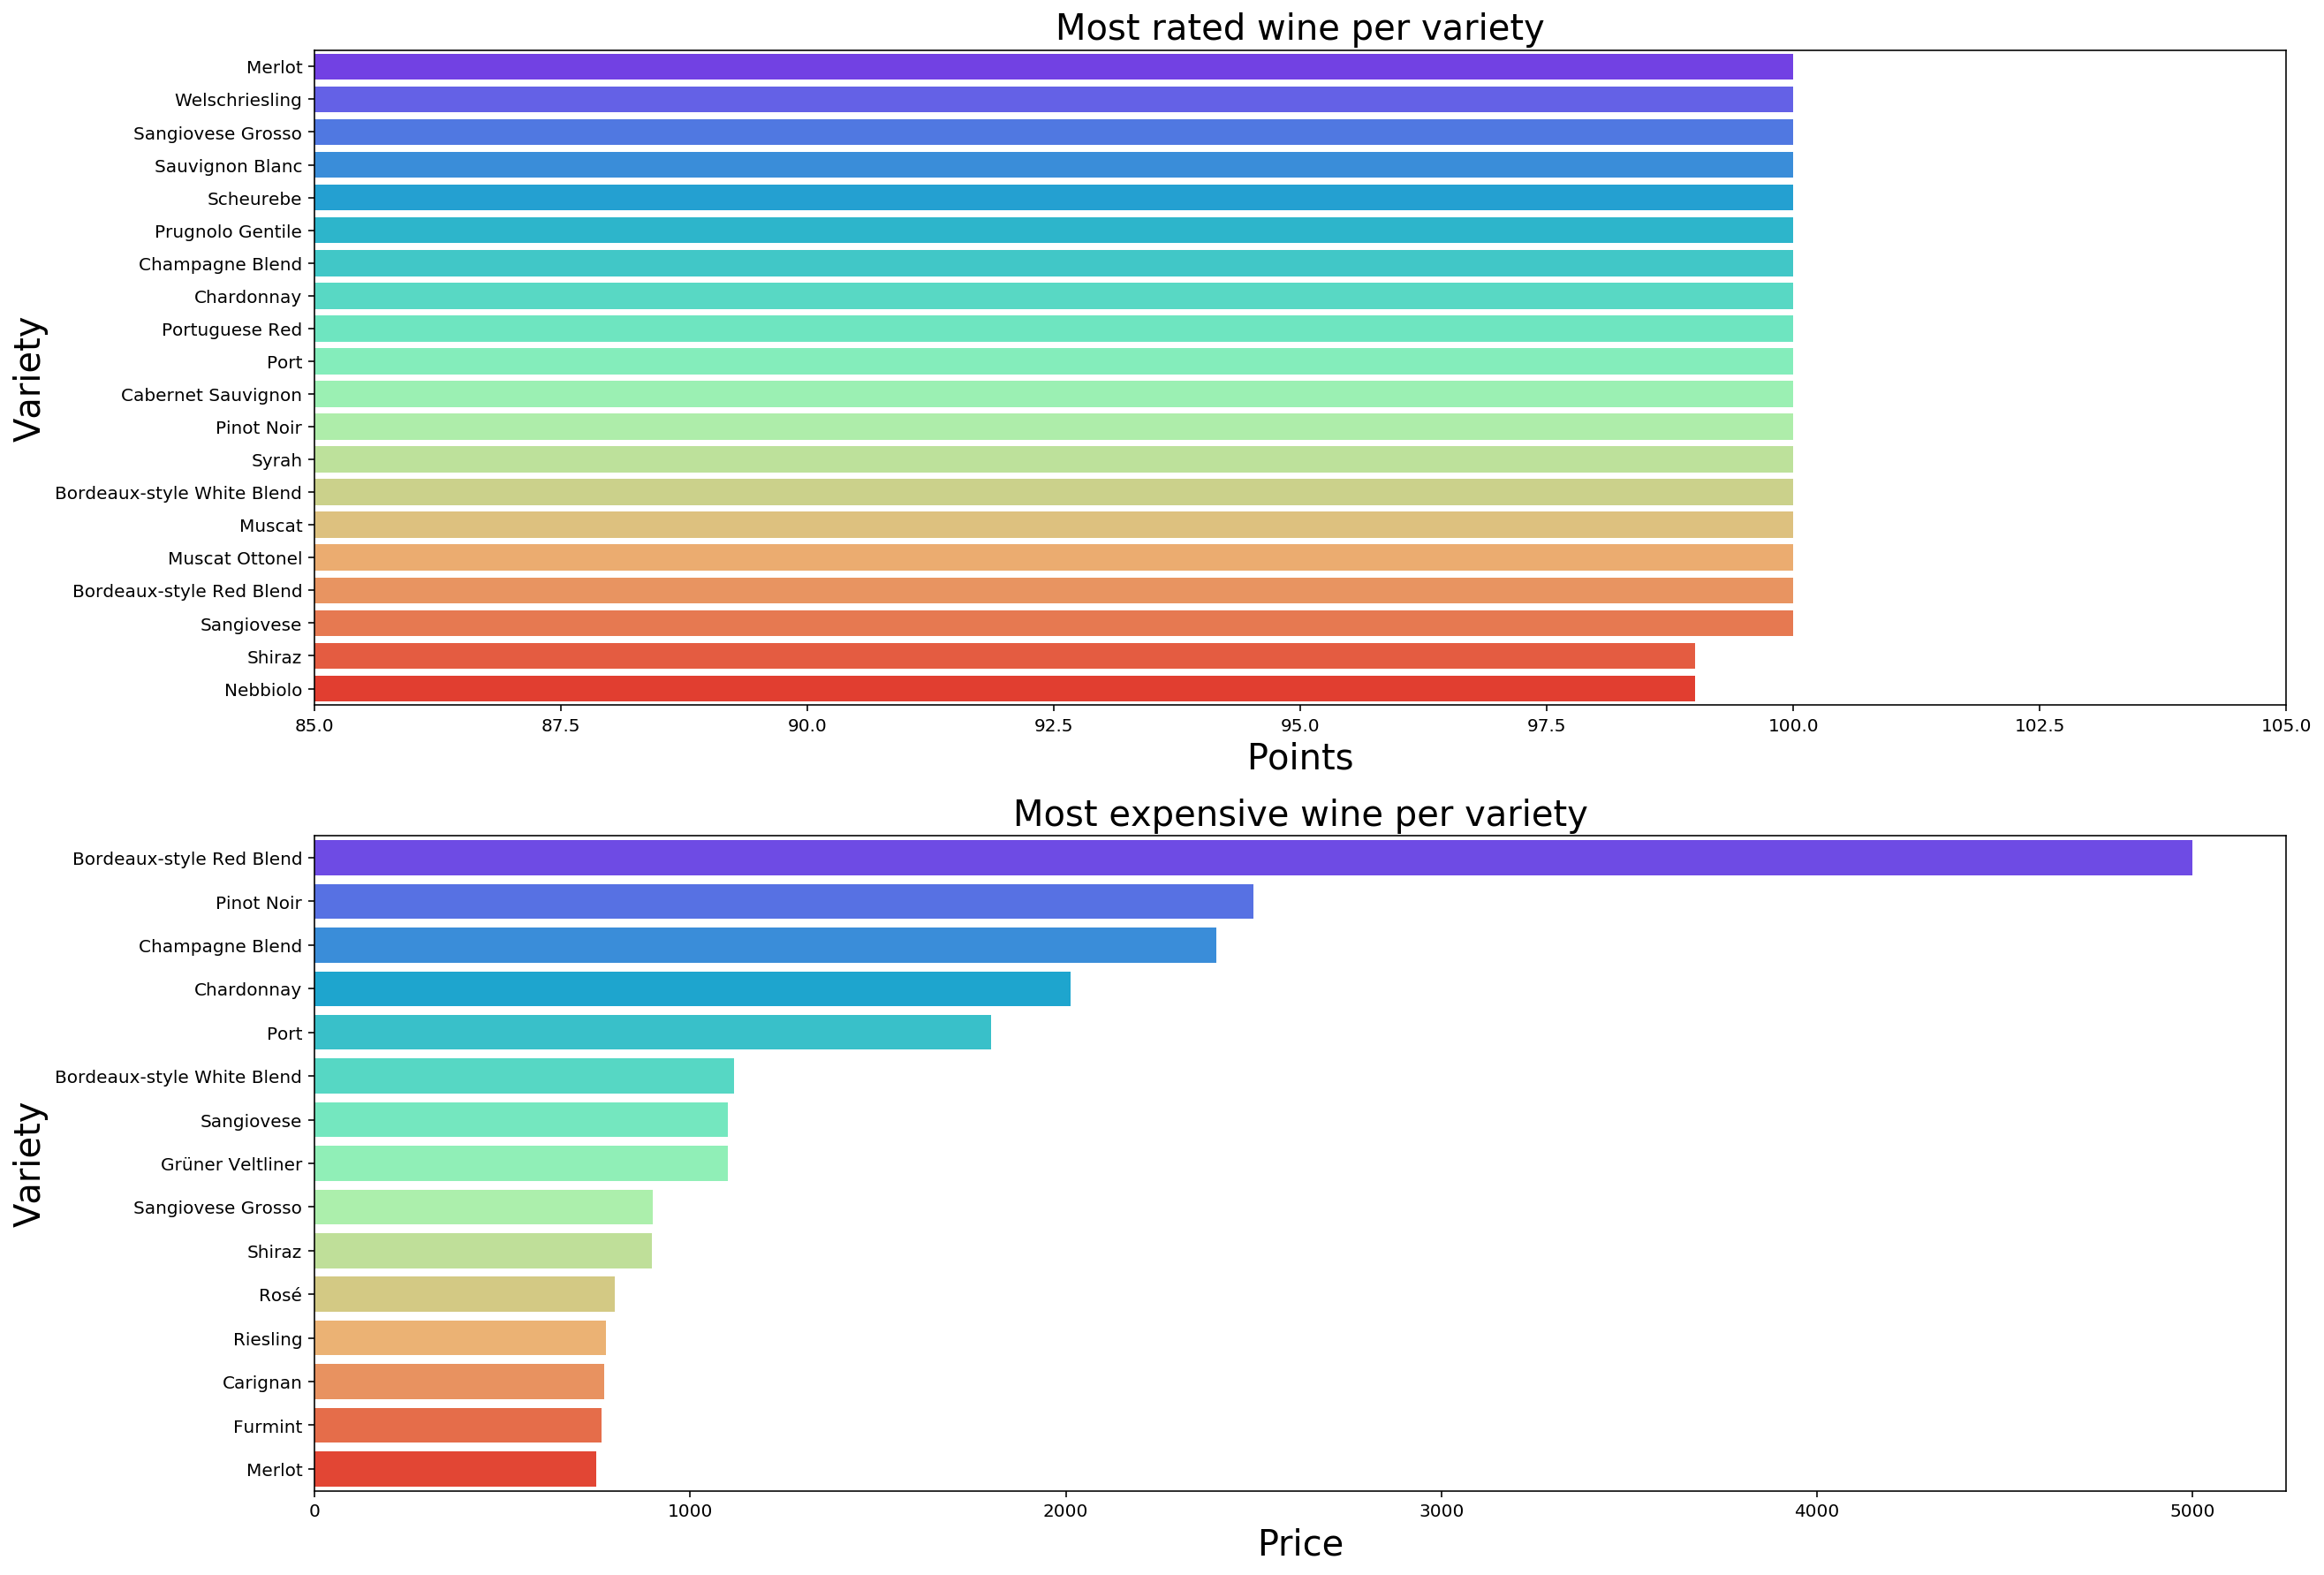

In [21]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
ax1,ax2 = ax.flatten()

country_points_max = vino.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:20]
sns.barplot(x = country_points_max['points'], y = country_points_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most rated wine per variety', fontsize=20)
ax1.set_ylabel('Variety',fontsize=20)
ax1.set_xlim(xmin=85)
ax1.set_xlabel('Points',fontsize=20)
country_price_max = vino.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_price_max['price'], y = country_price_max.index, palette= 'rainbow',ax=ax2)
ax2.set_title('Most expensive wine per variety', fontsize=20)
ax2.set_ylabel('Variety',fontsize=20)
ax2.set_xlabel('Price',fontsize=20)
plt.show()

## Relation between Country and Prices and Points 

- I surprised so much with these results.  
- The wines from England have the highest average of points. However, Italy, Portugal, US, Australia, Austria, France are the countries which wines have the highest points. 
- The wines from China have the highest average of price. The most expensive wines are from France, but this country has also a lot of cheap wines.
- Kosovo is the country with the best average quality/price wines.


### Average

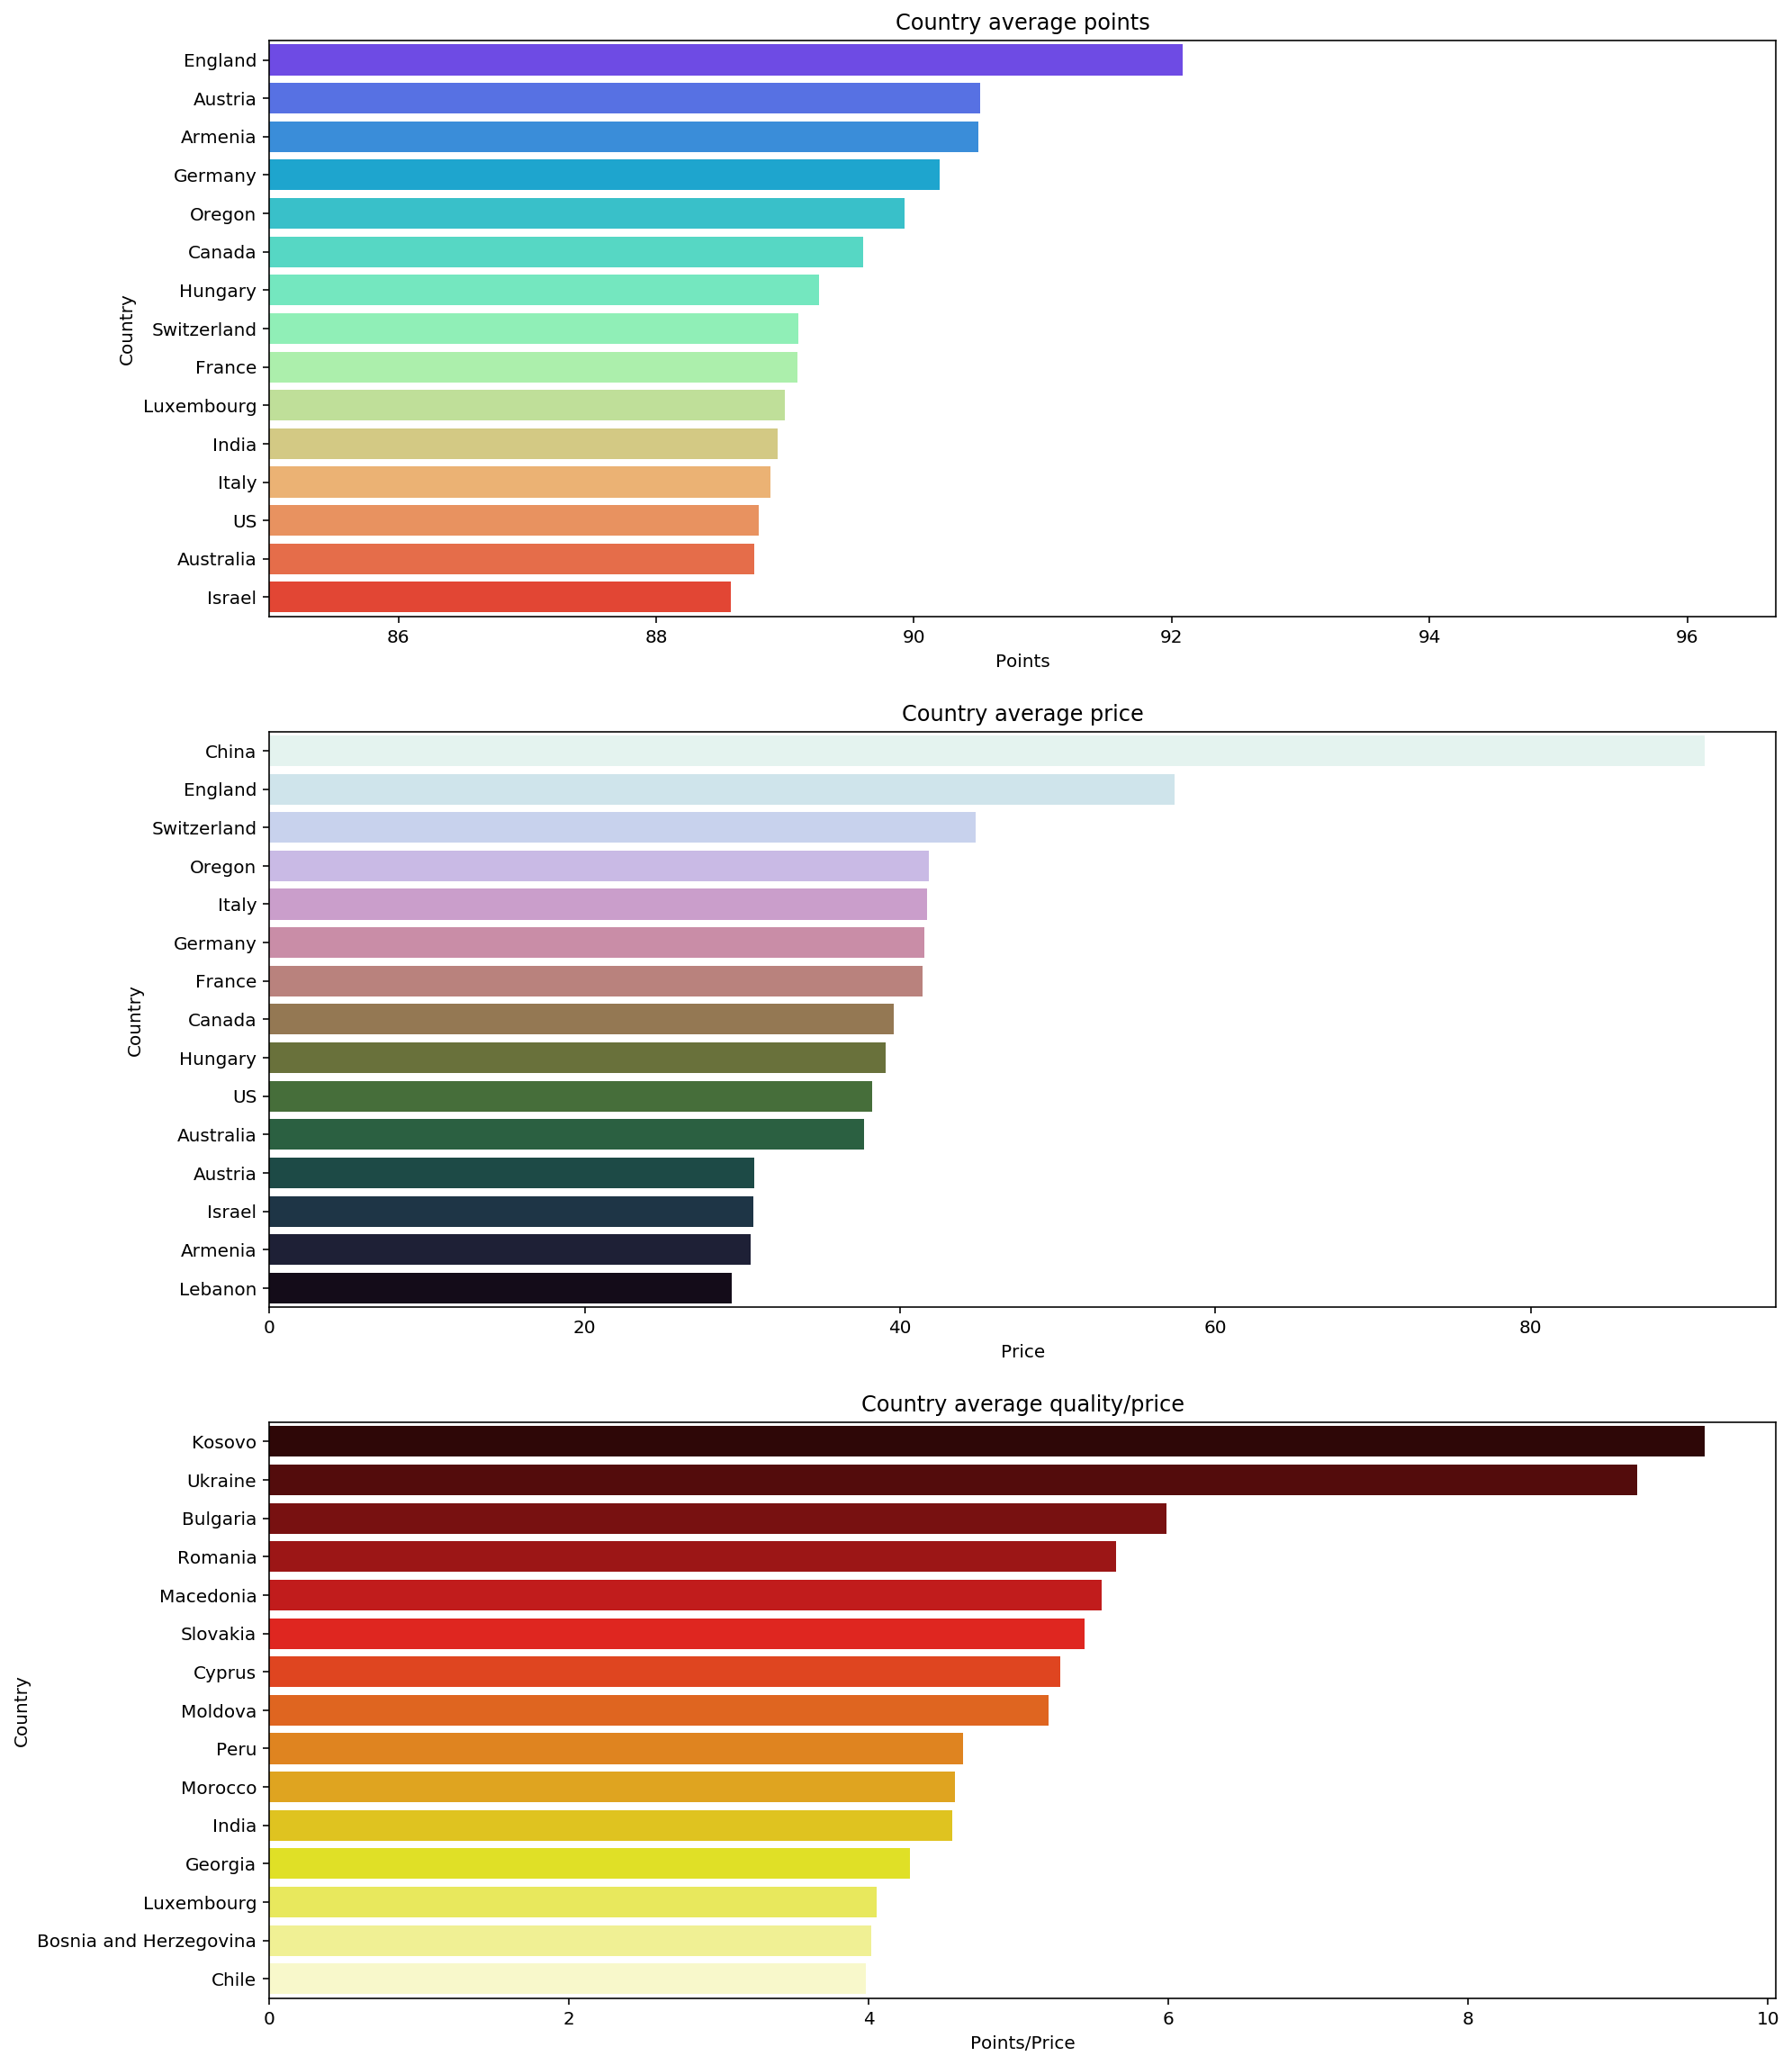

In [22]:
vino_country_points = vino.groupby('country').mean().sort_values(by='points', ascending = False)[:15]
vino_country_price = vino.groupby('country').mean().sort_values(by='price', ascending = False)[:15]
vino_country = vino.groupby('country').mean()
vino_country['points/price'] = (vino_country.points / vino_country.price)
vino_country = vino_country.sort_values(by='points/price',ascending = False)[:15]

fig,ax = plt.subplots(3,1, figsize=(15,20))

sns.barplot(x = vino_country_points['points'], y = vino_country_points.index, palette= 'rainbow', ax=ax[0])
sns.barplot(x = vino_country_price['price'], y = vino_country_price.index, palette= 'cubehelix_r', ax=ax[1])
sns.barplot(x = vino_country['points/price'], y = vino_country.index, palette= 'hot', ax=ax[2])

ax[0].set_title('Country average points')
ax[0].set_ylabel('Country')
ax[0].set_xlabel('Points')
ax[0].set_xlim(xmin=85)
ax[1].set_title('Country average price')
ax[1].set_ylabel('Country')
ax[1].set_xlabel('Price')
ax[2].set_title('Country average quality/price')
ax[2].set_ylabel('Country')
ax[2].set_xlabel('Points/Price')
plt.show()

### Maximum

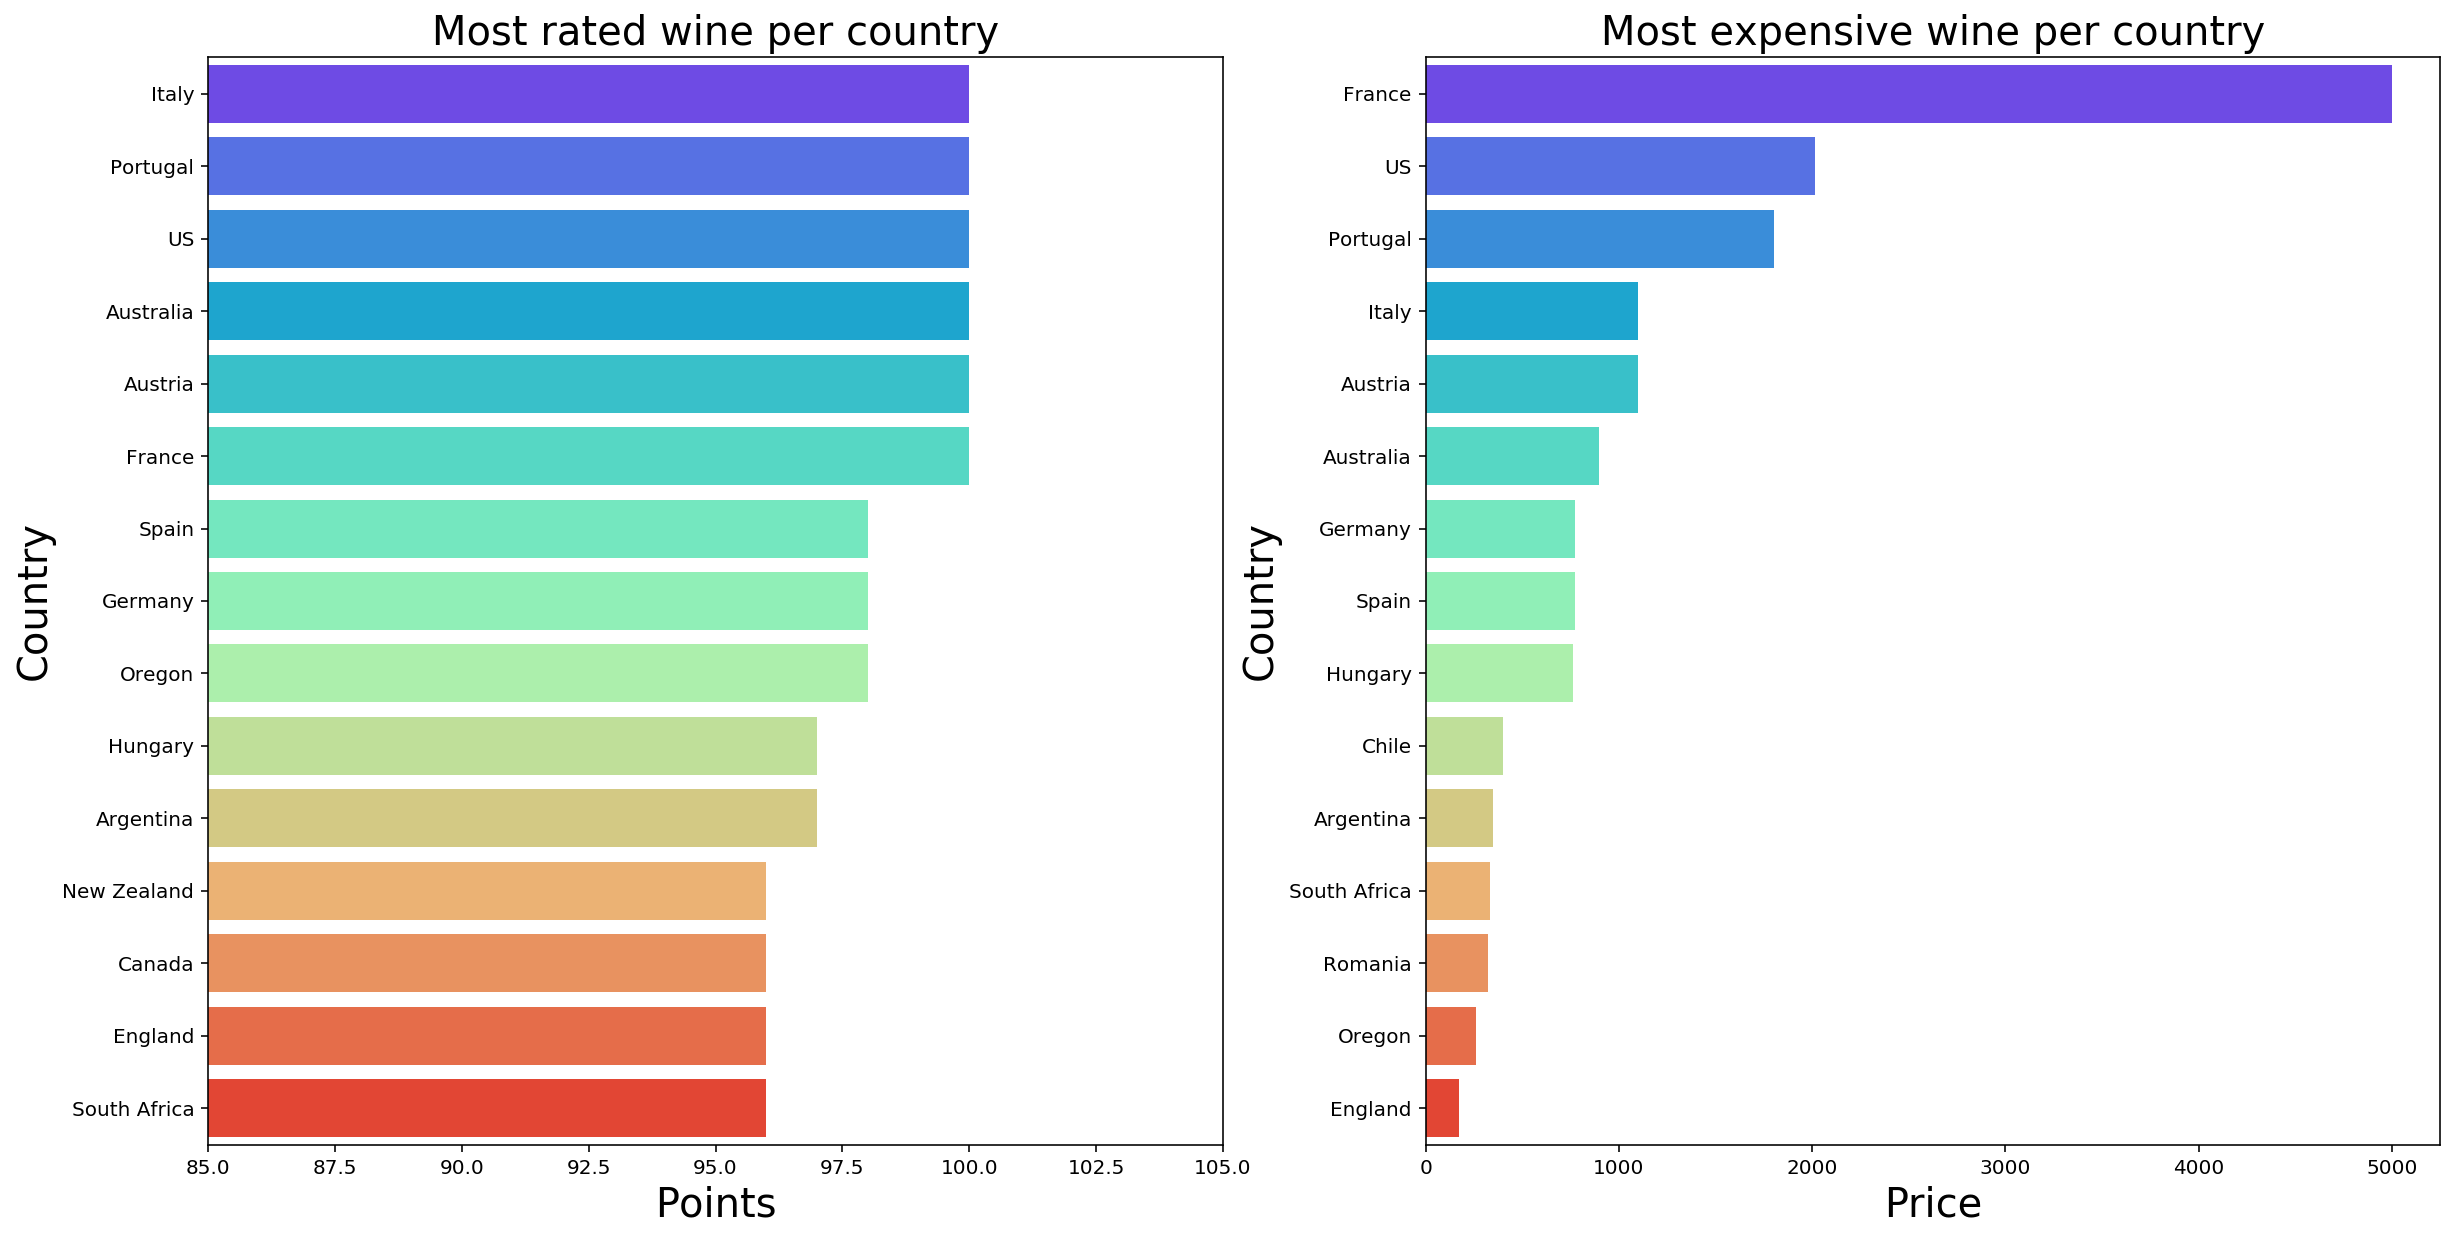

In [23]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax1,ax2 = ax.flatten()

country_points_max = vino.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_points_max['points'], y = country_points_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most rated wine per country', fontsize=20)
ax1.set_ylabel('Country',fontsize=20)
ax1.set_xlabel('Points',fontsize=20)
ax1.set_xlim(xmin=85)
country_price_max = vino.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_price_max['price'], y = country_price_max.index, palette= 'rainbow',ax=ax2)
ax2.set_title('Most expensive wine per country', fontsize=20)
ax2.set_ylabel('Country',fontsize=20)
ax2.set_xlabel('Price',fontsize=20)
plt.show()

## Relation between Winery and Prices and Points

- The wineries with the highest average of points are from California and France. From France, California, Italy and Portugalare the wineries which have the highest points in their wine's reviews.
- The wineries with the highest average of prices are from France. Chateau Albelyce is the winery with the wine most expensive.
- The wineries with the highest average of quality/price are from USA.

### Average

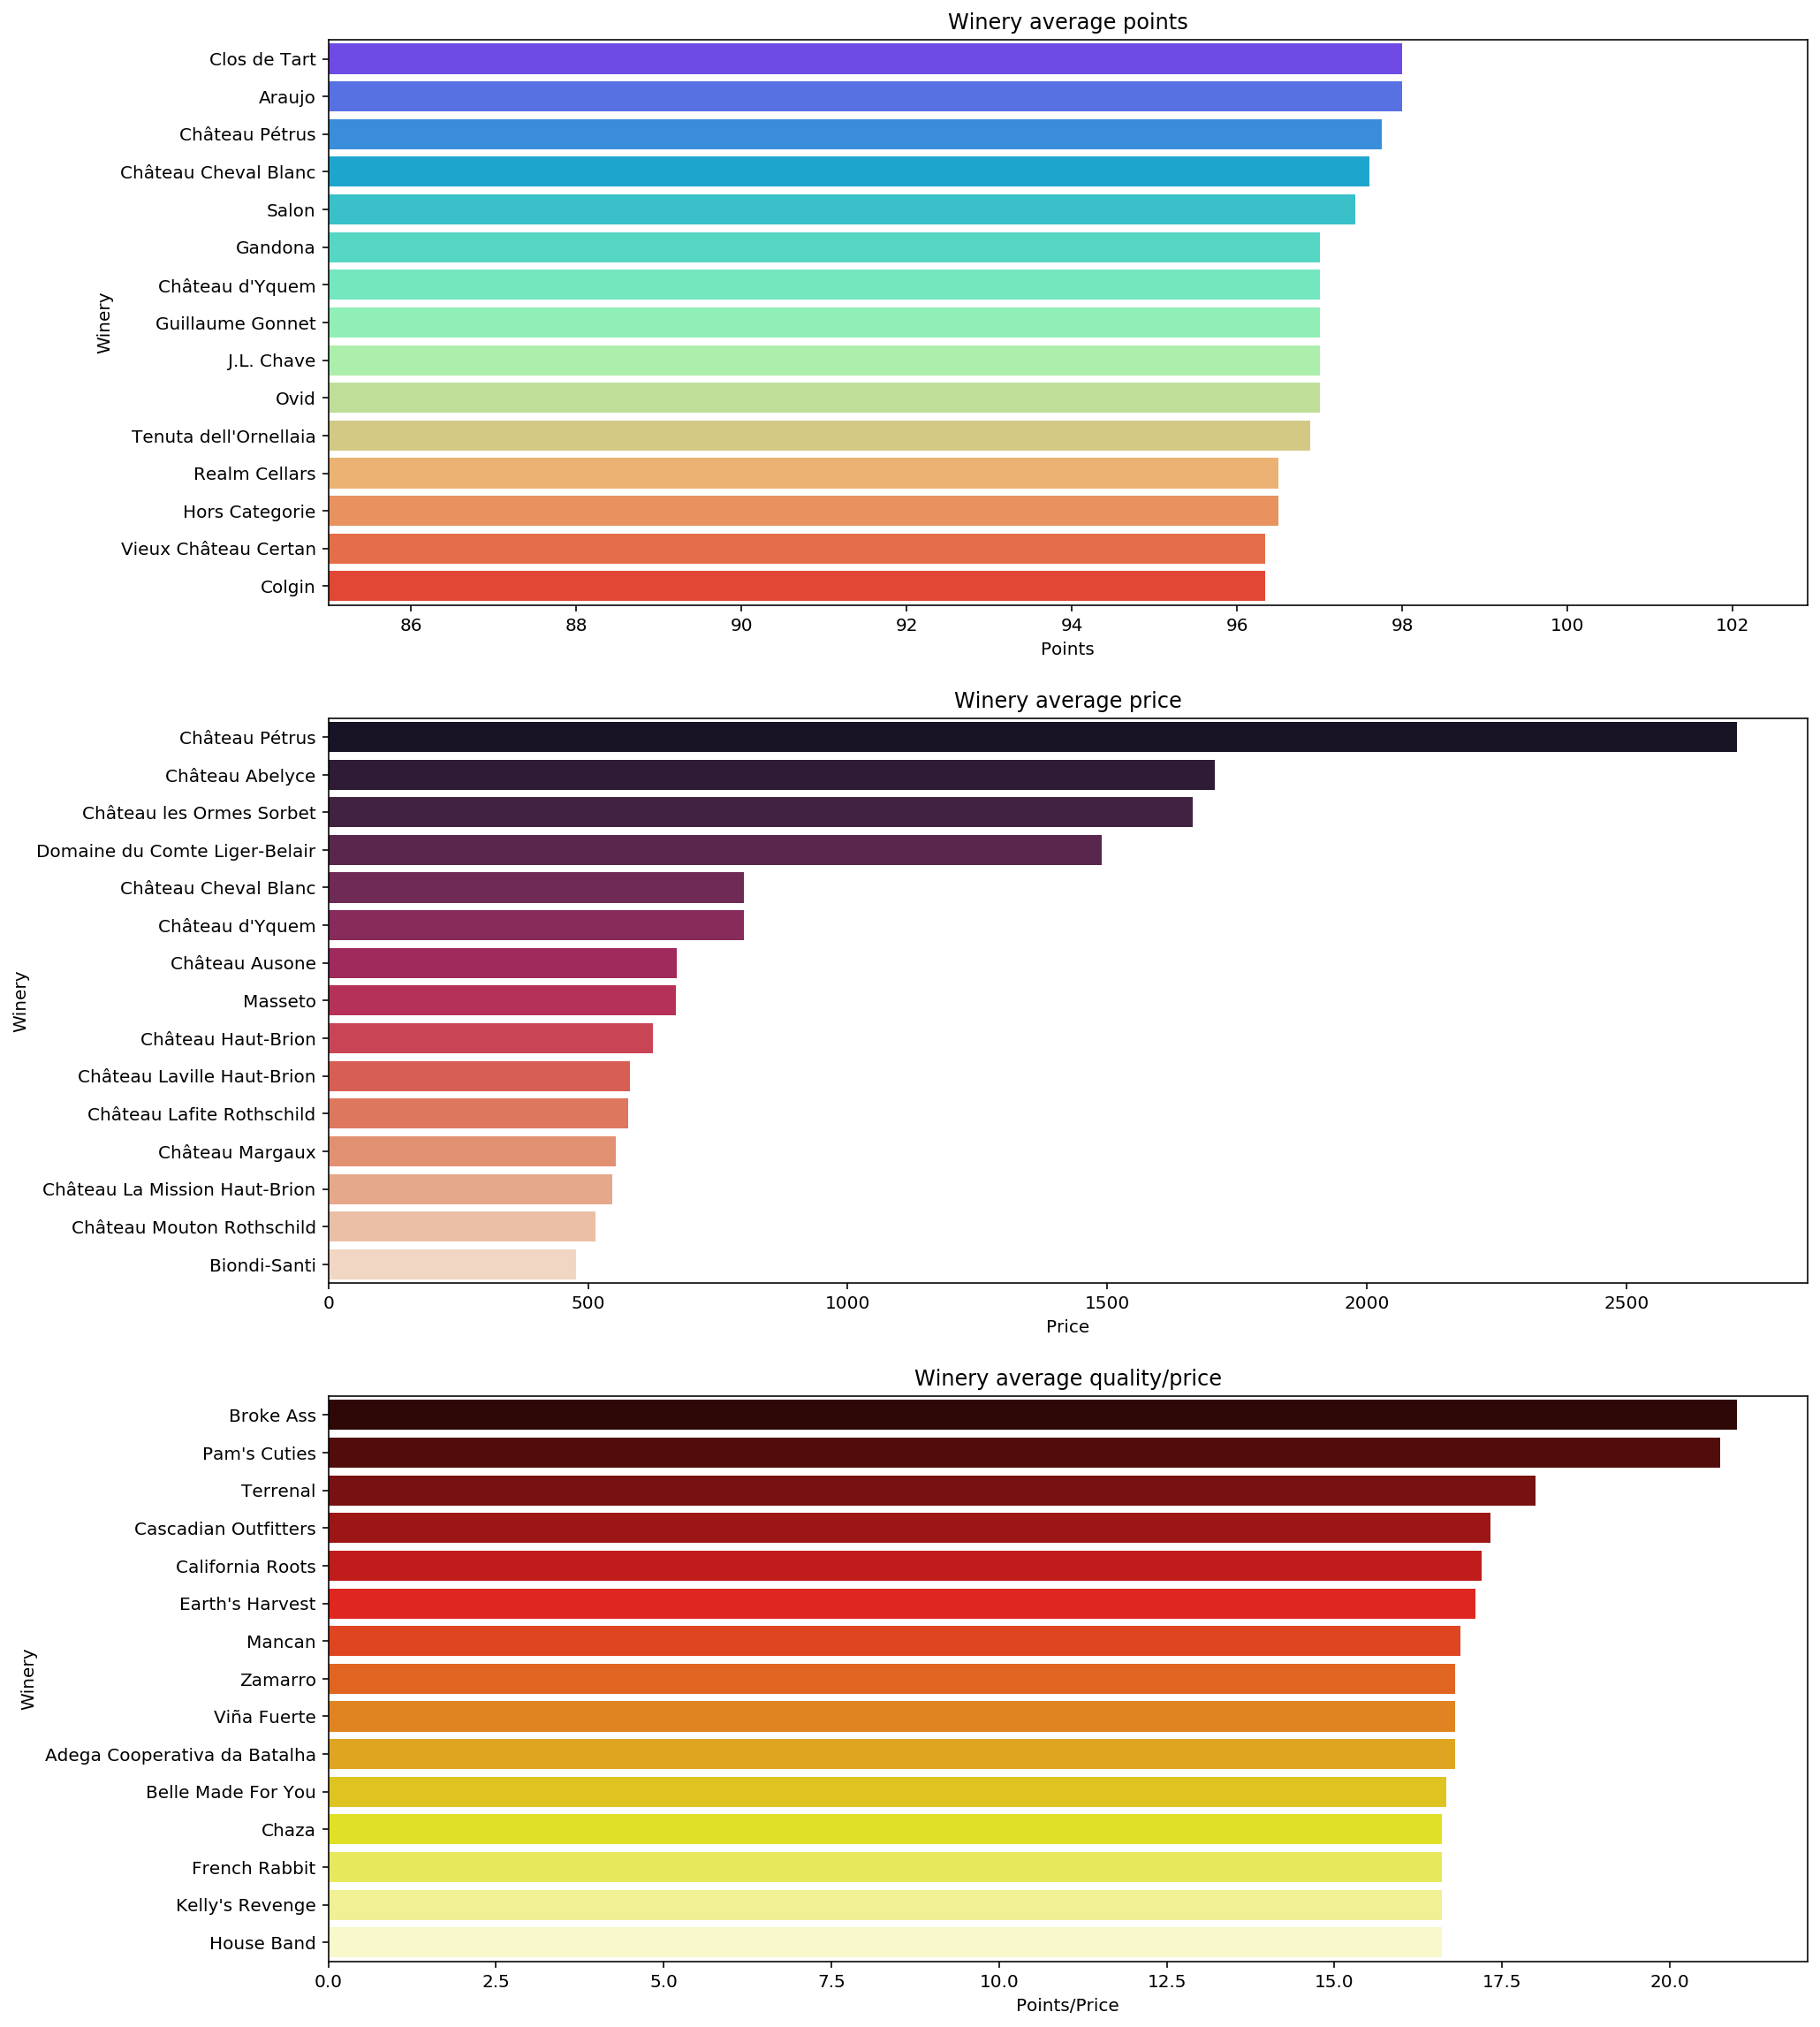

In [24]:
vino_winery_points = vino.groupby('winery').mean().sort_values(by='points', ascending = False)[:15]
vino_winery_price = vino.groupby('winery').mean().sort_values(by='price', ascending = False)[:15]
vino_winery = vino.groupby('winery').mean()
vino_winery['points/price'] = (vino_winery.points / vino_winery.price)
vino_winery = vino_winery.sort_values(by='points/price',ascending = False)[:15]

fig,ax = plt.subplots(3,1, figsize=(15,20))

sns.barplot(x = vino_winery_points['points'], y = vino_winery_points.index, palette= 'rainbow', ax=ax[0])
sns.barplot(x = vino_winery_price['price'], y = vino_winery_price.index, palette= 'rocket', ax=ax[1])
sns.barplot(x = vino_winery['points/price'], y = vino_winery.index, palette= 'hot', ax=ax[2])

ax[0].set_title('Winery average points')
ax[0].set_ylabel('Winery')
ax[0].set_xlabel('Points')
ax[0].set_xlim(xmin=85)
ax[1].set_title('Winery average price')
ax[1].set_ylabel('Winery')
ax[1].set_xlabel('Price')
ax[2].set_title('Winery average quality/price')
ax[2].set_ylabel('Winery')
ax[2].set_xlabel('Points/Price')
plt.show()

### Maximum

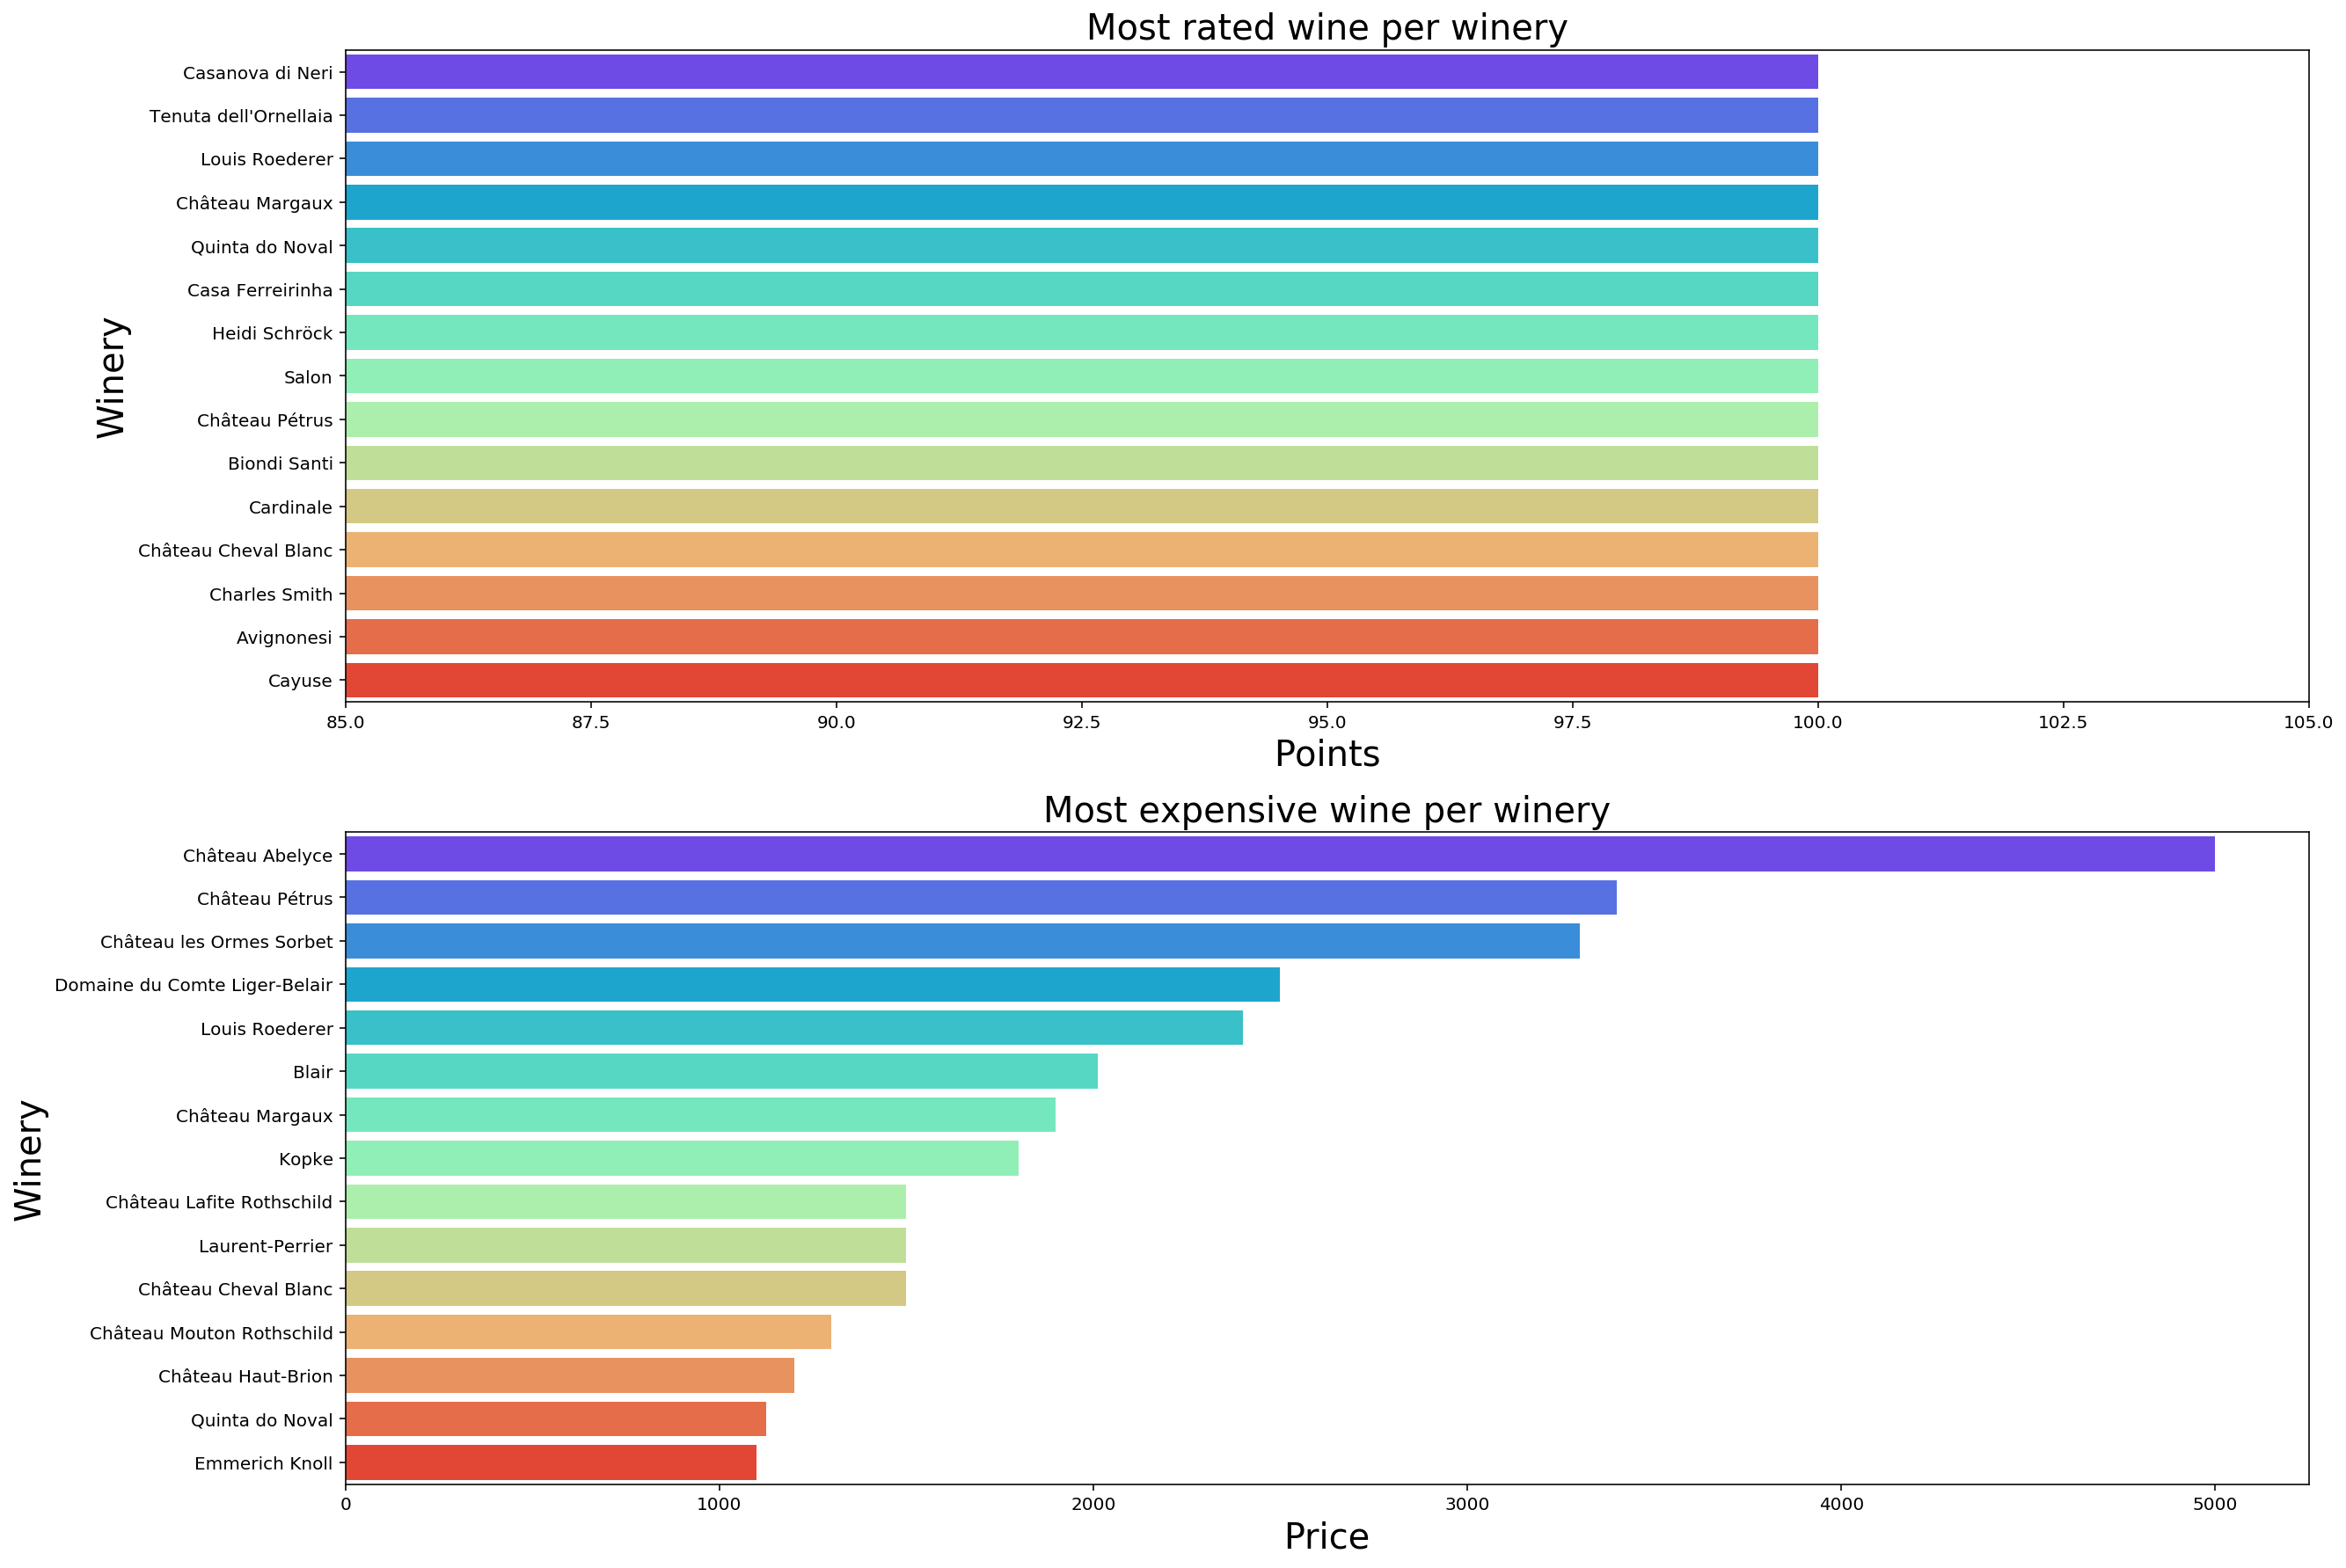

In [25]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
ax1,ax2 = ax.flatten()

country_points_max = vino.groupby(['winery'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_points_max['points'], y = country_points_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most rated wine per winery', fontsize=20)
ax1.set_ylabel('Winery',fontsize=20)
ax1.set_xlabel('Points', fontsize=20)
ax1.set_xlim(xmin=85)
country_price_max = vino.groupby(['winery'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_price_max['price'], y = country_price_max.index, palette= 'rainbow',ax=ax2)
ax2.set_title('Most expensive wine per winery', fontsize=20)
ax2.set_ylabel('Winery',fontsize=20)
ax2.set_xlabel('Price', fontsize=20)
plt.show()

## Relation between Province and Prices and Points

- The provinces with the highest average of points in their wines are in France and Italy. The provinces with the highest points in their wines are France, Portugal, Italy and US
- The province with the highest average of price and the most expensive wine in its wines is France.
- Italy is the province with highest average of quality and prices in its wines.

### Average

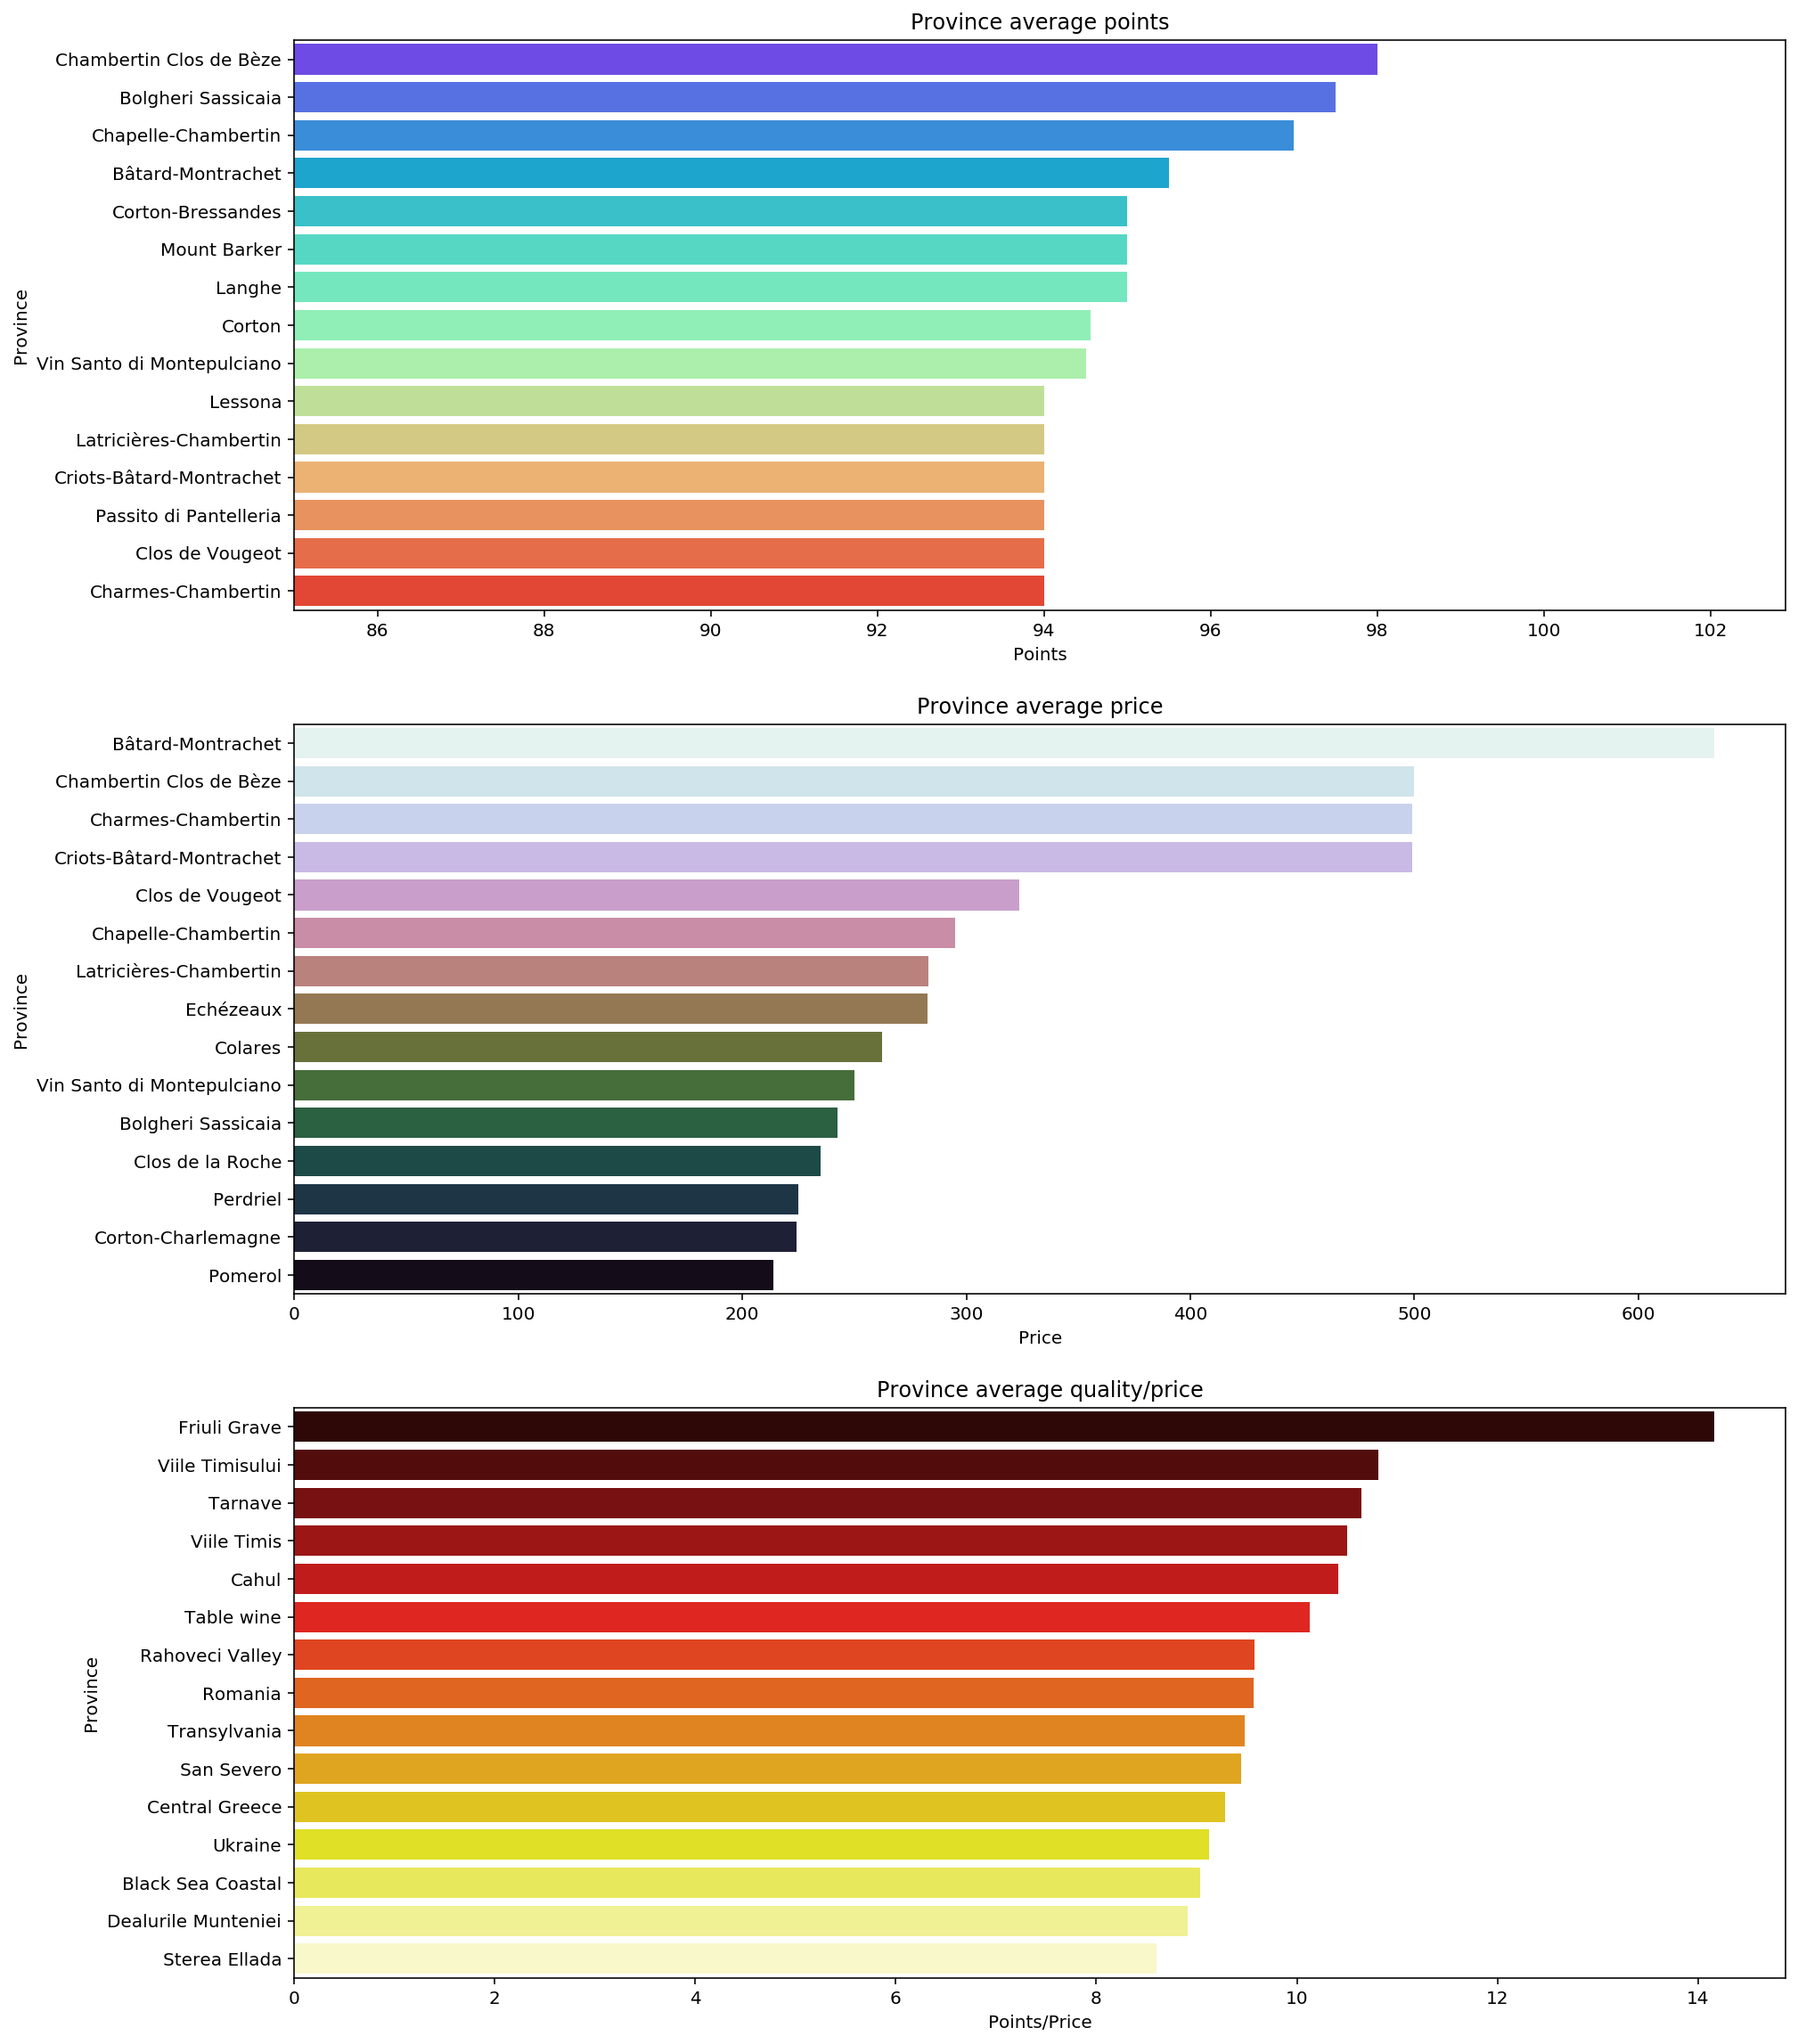

In [26]:
vino_province_points = vino.groupby('province').mean().sort_values(by='points', ascending = False)[:15]
vino_province_price = vino.groupby('province').mean().sort_values(by='price', ascending = False)[:15]
vino_province = vino.groupby('province').mean()
vino_province['points/price'] = (vino_province.points / vino_province.price)
vino_province = vino_province.sort_values(by='points/price',ascending = False)[:15]

fig,ax = plt.subplots(3,1, figsize=(15,20))

sns.barplot(x = vino_province_points['points'], y = vino_province_points.index, palette= 'rainbow', ax=ax[0])
sns.barplot(x = vino_province_price['price'], y = vino_province_price.index, palette= 'cubehelix_r', ax=ax[1])
sns.barplot(x = vino_province['points/price'], y = vino_province.index, palette= 'hot', ax=ax[2])

ax[0].set_title('Province average points')
ax[0].set_ylabel('Province')
ax[0].set_xlabel('Points')
ax[0].set_xlim(xmin=85)
ax[1].set_title('Province average price')
ax[1].set_ylabel('Province')
ax[1].set_xlabel('Price')
ax[2].set_title('Province average quality/price')
ax[2].set_ylabel('Province')
ax[2].set_xlabel('Points/Price')
plt.show()

### Maximum

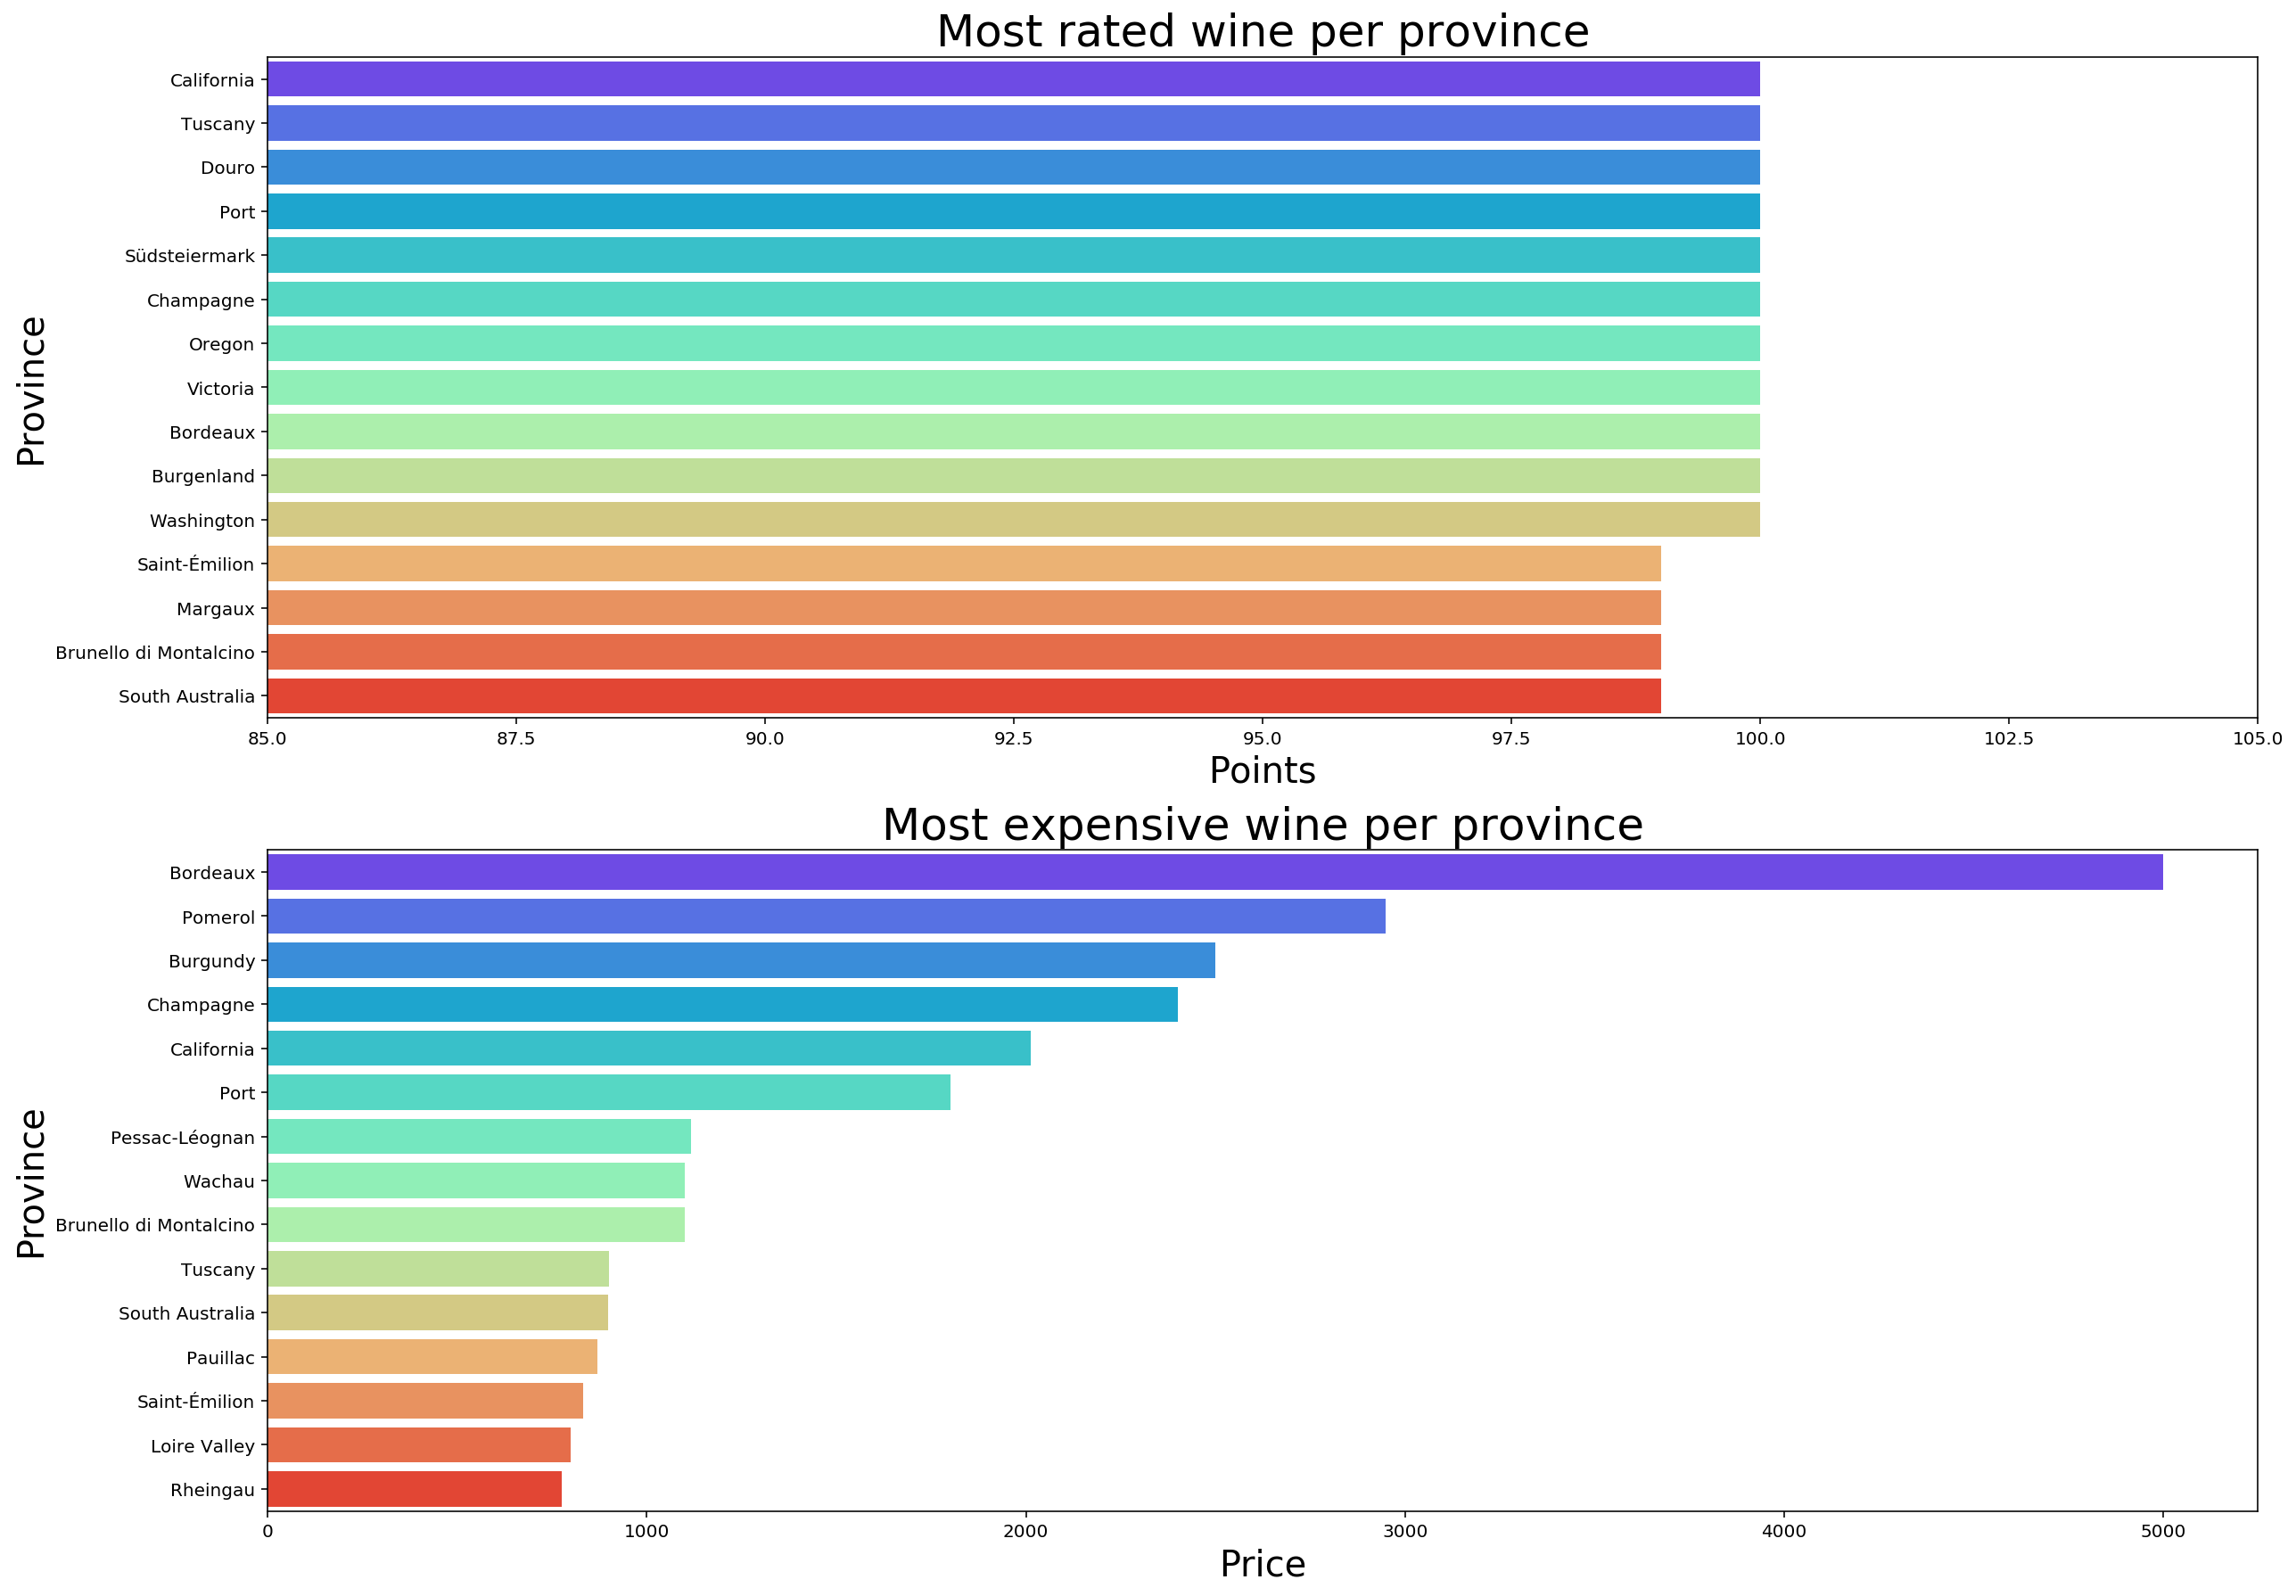

In [27]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
ax1,ax2 = ax.flatten()

country_points_max = vino.groupby(['province'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_points_max['points'], y = country_points_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most rated wine per province', fontsize=25)
ax1.set_ylabel('Province',fontsize=20)
ax1.set_xlabel('Points',fontsize=20)
ax1.set_xlim(xmin=85)
country_price_max = vino.groupby(['province'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_price_max['price'], y = country_price_max.index, palette= 'rainbow',ax=ax2)
ax2.set_title('Most expensive wine per province', fontsize=25)
ax2.set_ylabel('Province',fontsize=20)
ax2.set_xlabel('Price',fontsize=20)
plt.show()

## WINE DESCRIPTION

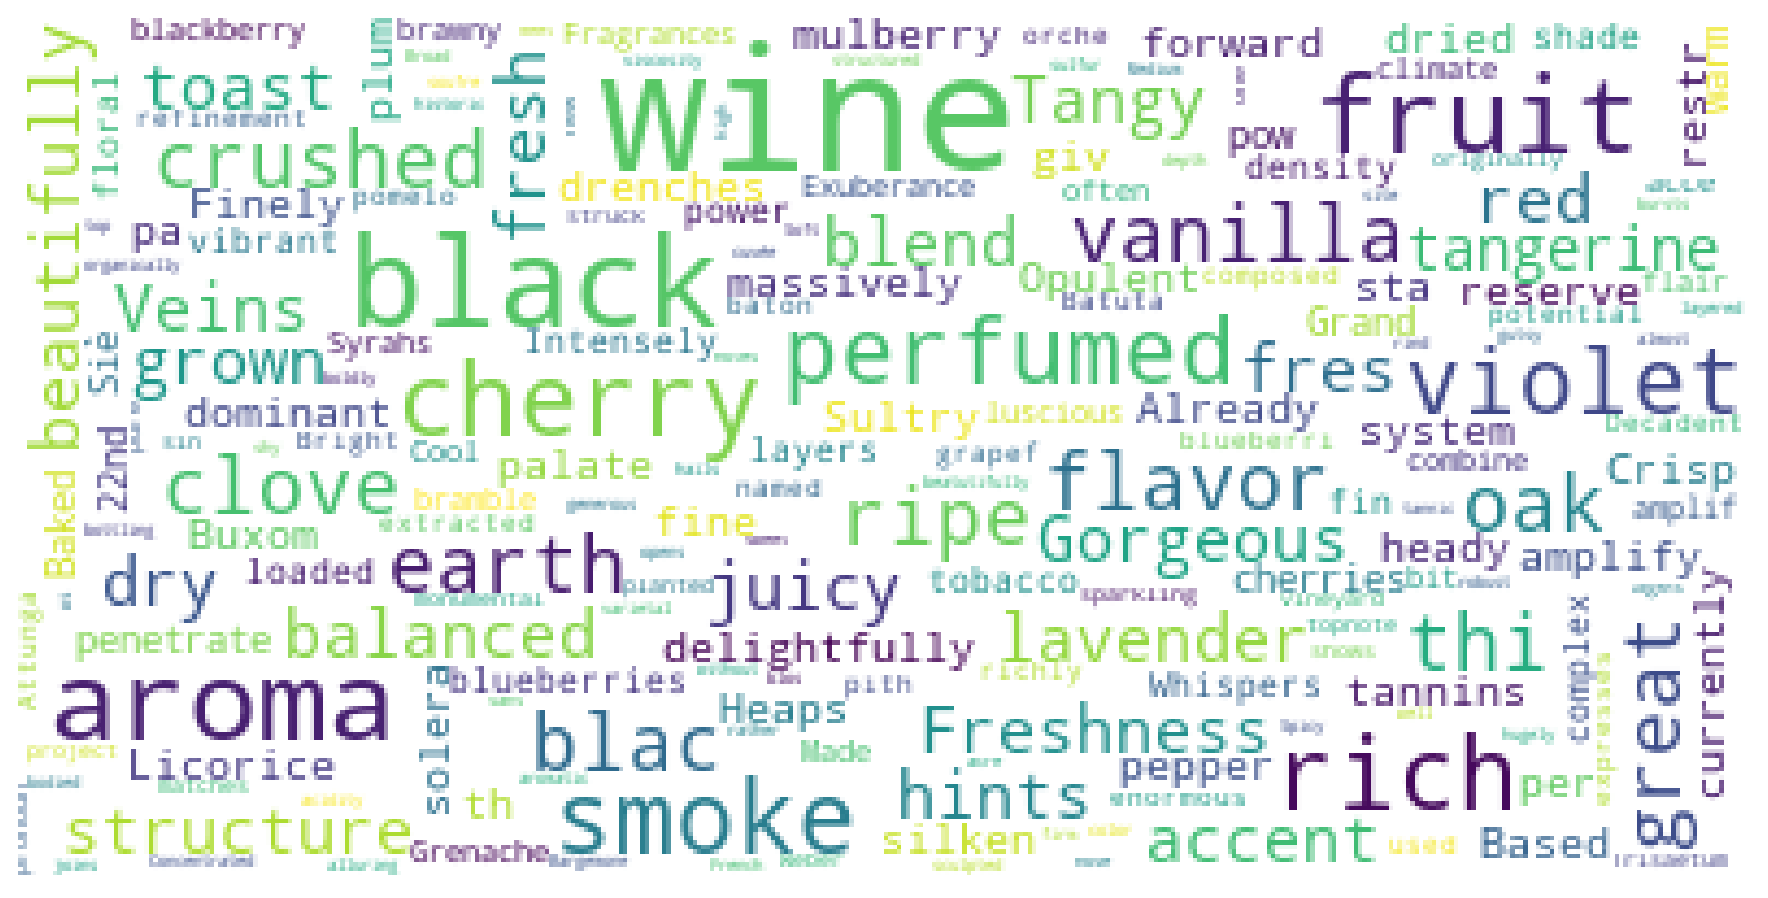

In [28]:

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(vino['description']))

print(wordcloud)
fig = plt.figure(figsize = (18, 8),facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [29]:
# I used the CountVectorizer to count words
cvec1 = CountVectorizer(strip_accents='unicode', ngram_range=(1, 1))
#strip_accents with 'inicode' that remove the accents and use NKFD normalization.
#ngram_range is the lower and upper boundary of the range of n values for different n-grams to be extracted
X_all1 = cvec1.fit_transform(vino['description'])
columns1 = cvec1.get_feature_names()

# note this is a large sparse matrix.
#    - rows are tweets, columns are words
X_all1

<166716x32423 sparse matrix of type '<class 'numpy.int64'>'
	with 5852734 stored elements in Compressed Sparse Row format>

In [30]:
# Converting X_all toarray() may use too much memory (particularly for 32-bit Python!)
# we'll use np.sum() to convert it directly from the sparse matrix.
# This is enormously more memory-efficient
# It only requires one int per column since summing across columns is the total word count.


def get_freq_words(sparse_counts, columns):

    # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
    #   which we then convert into a 1-D ndarray for sorting

    word_counts = np.ravel(X_all1.sum(axis=0))
    freq_words = pd.Series(
        word_counts, index=columns).sort_values(ascending=False)

    return freq_words




freq_words1 = get_freq_words(X_all1, columns1)
freq_words1[:20]

and        450462
the        288236
of         229304
this       153138
with       146843
is         122586
wine       103466
it         102608
in          82121
flavors     82117
to          72210
on          66199
fruit       63016
palate      59176
aromas      57058
that        49576
acidity     46380
finish      46109
from        44648
tannins     42422
dtype: int64

Note above that many of the most common words actually may not be relevant to determining wine language.
Also, I am removing important features such as capitalization, punctuation, sentence length, etc. that might be important for determining language.

Histagram of word counts

In [31]:
def hist_counts(series, bins=np.logspace(0, 5, 25), density=True):

    fig, ax = plt.subplots(figsize=(8, 4))
    series.hist(bins=bins, ax=ax, density=density)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title('Word count distribution')

    return fig, ax

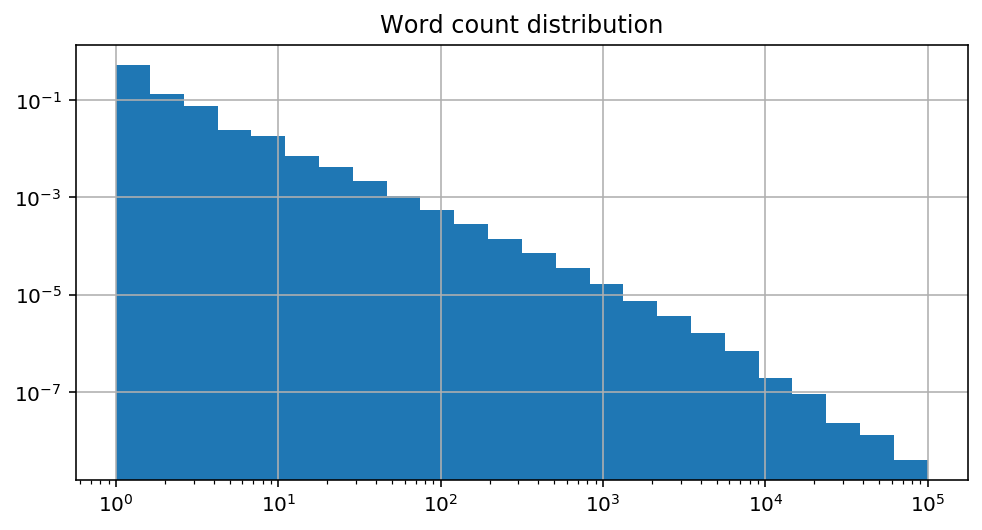

In [32]:
fig, ax = hist_counts(freq_words1)

I used 'stop_words' inside the CountVectorizer because I am going to eliminate most of the common words like 'and', 'the', 'of',..... that they are not relevant for the determining wine language.

In [33]:
cvec2 = CountVectorizer(strip_accents='unicode',
                       stop_words="english", 
                       ngram_range=(1, 1))

X_all2 = cvec2.fit_transform(vino['description'])
columns2 = cvec2.get_feature_names()
X_all2

<166716x32129 sparse matrix of type '<class 'numpy.int64'>'
	with 4047468 stored elements in Compressed Sparse Row format>

In [34]:
def get_freq_words(sparse_counts, columns):

    word_counts = np.ravel(X_all2.sum(axis=0))
    freq_words = pd.Series(
        word_counts, index=columns).sort_values(ascending=False)

    return freq_words




freq_words2 = get_freq_words(X_all2, columns2)
freq_words2[:20]

wine       103466
flavors     82117
fruit       63016
palate      59176
aromas      57058
acidity     46380
finish      46109
tannins     42422
drink       42387
black       40036
cherry      39143
ripe        36044
red         29917
nose        27498
spice       24863
notes       24478
oak         23954
berry       22739
fresh       22279
rich        21977
dtype: int64

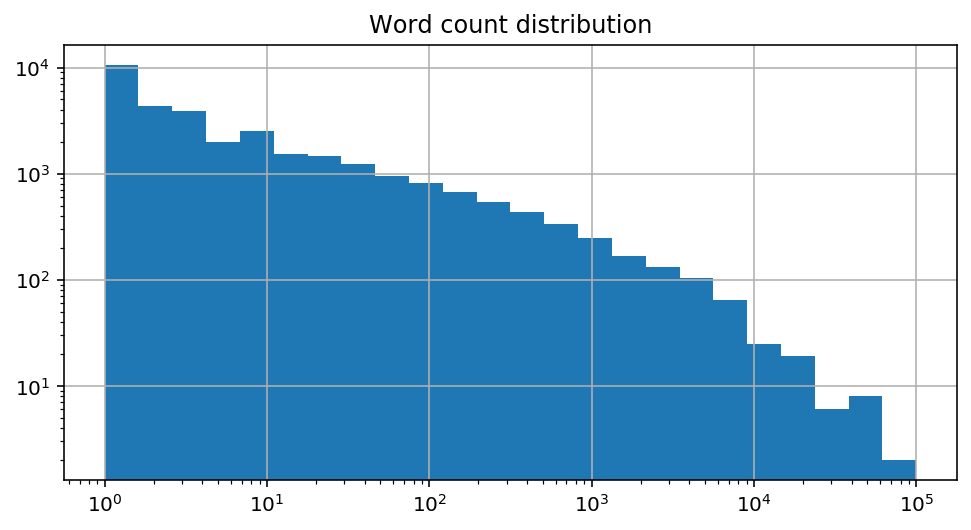

In [35]:
fig, ax = hist_counts(freq_words2, density=False)

The frequence of the words after remove some of the common words that they are not relative with wine language, are huge.

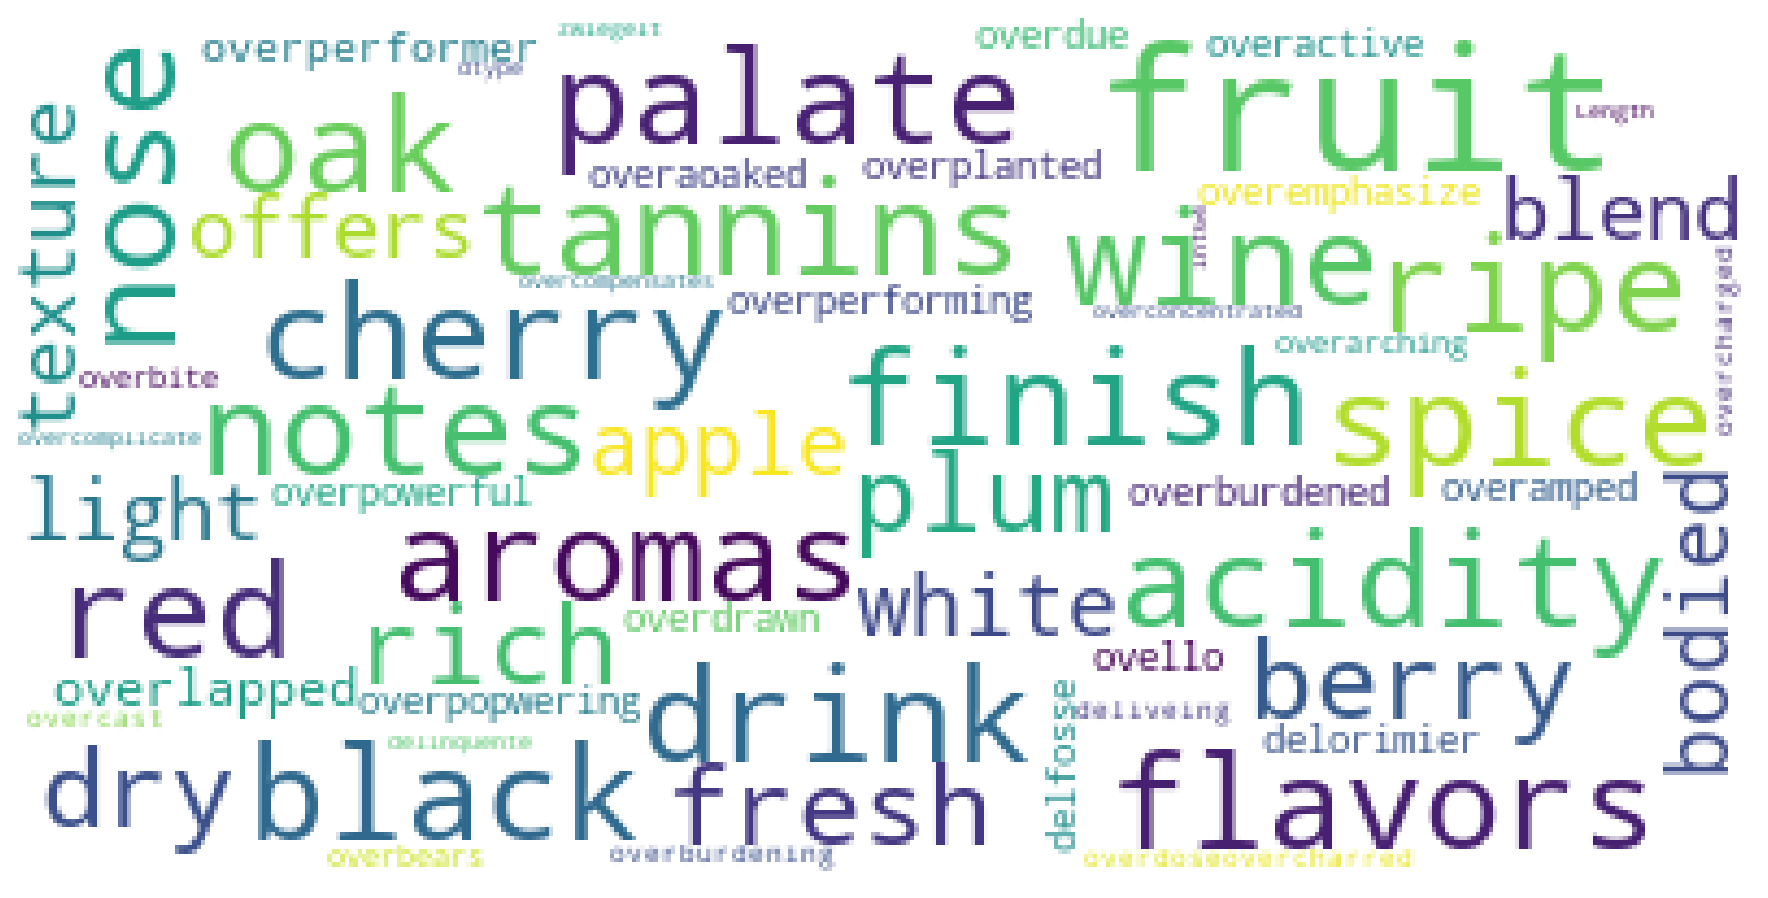

In [36]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(freq_words2))

print(wordcloud)
fig = plt.figure(figsize = (18, 8),facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [37]:
wine_mask = np.array(Image.open("wine_mask_4.png"))
# Values of 255 are pure white, whereas values of 1 are black
# I used the transform_format() function to swap number 0 to 255.
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [38]:
#Transform the mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))
#Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

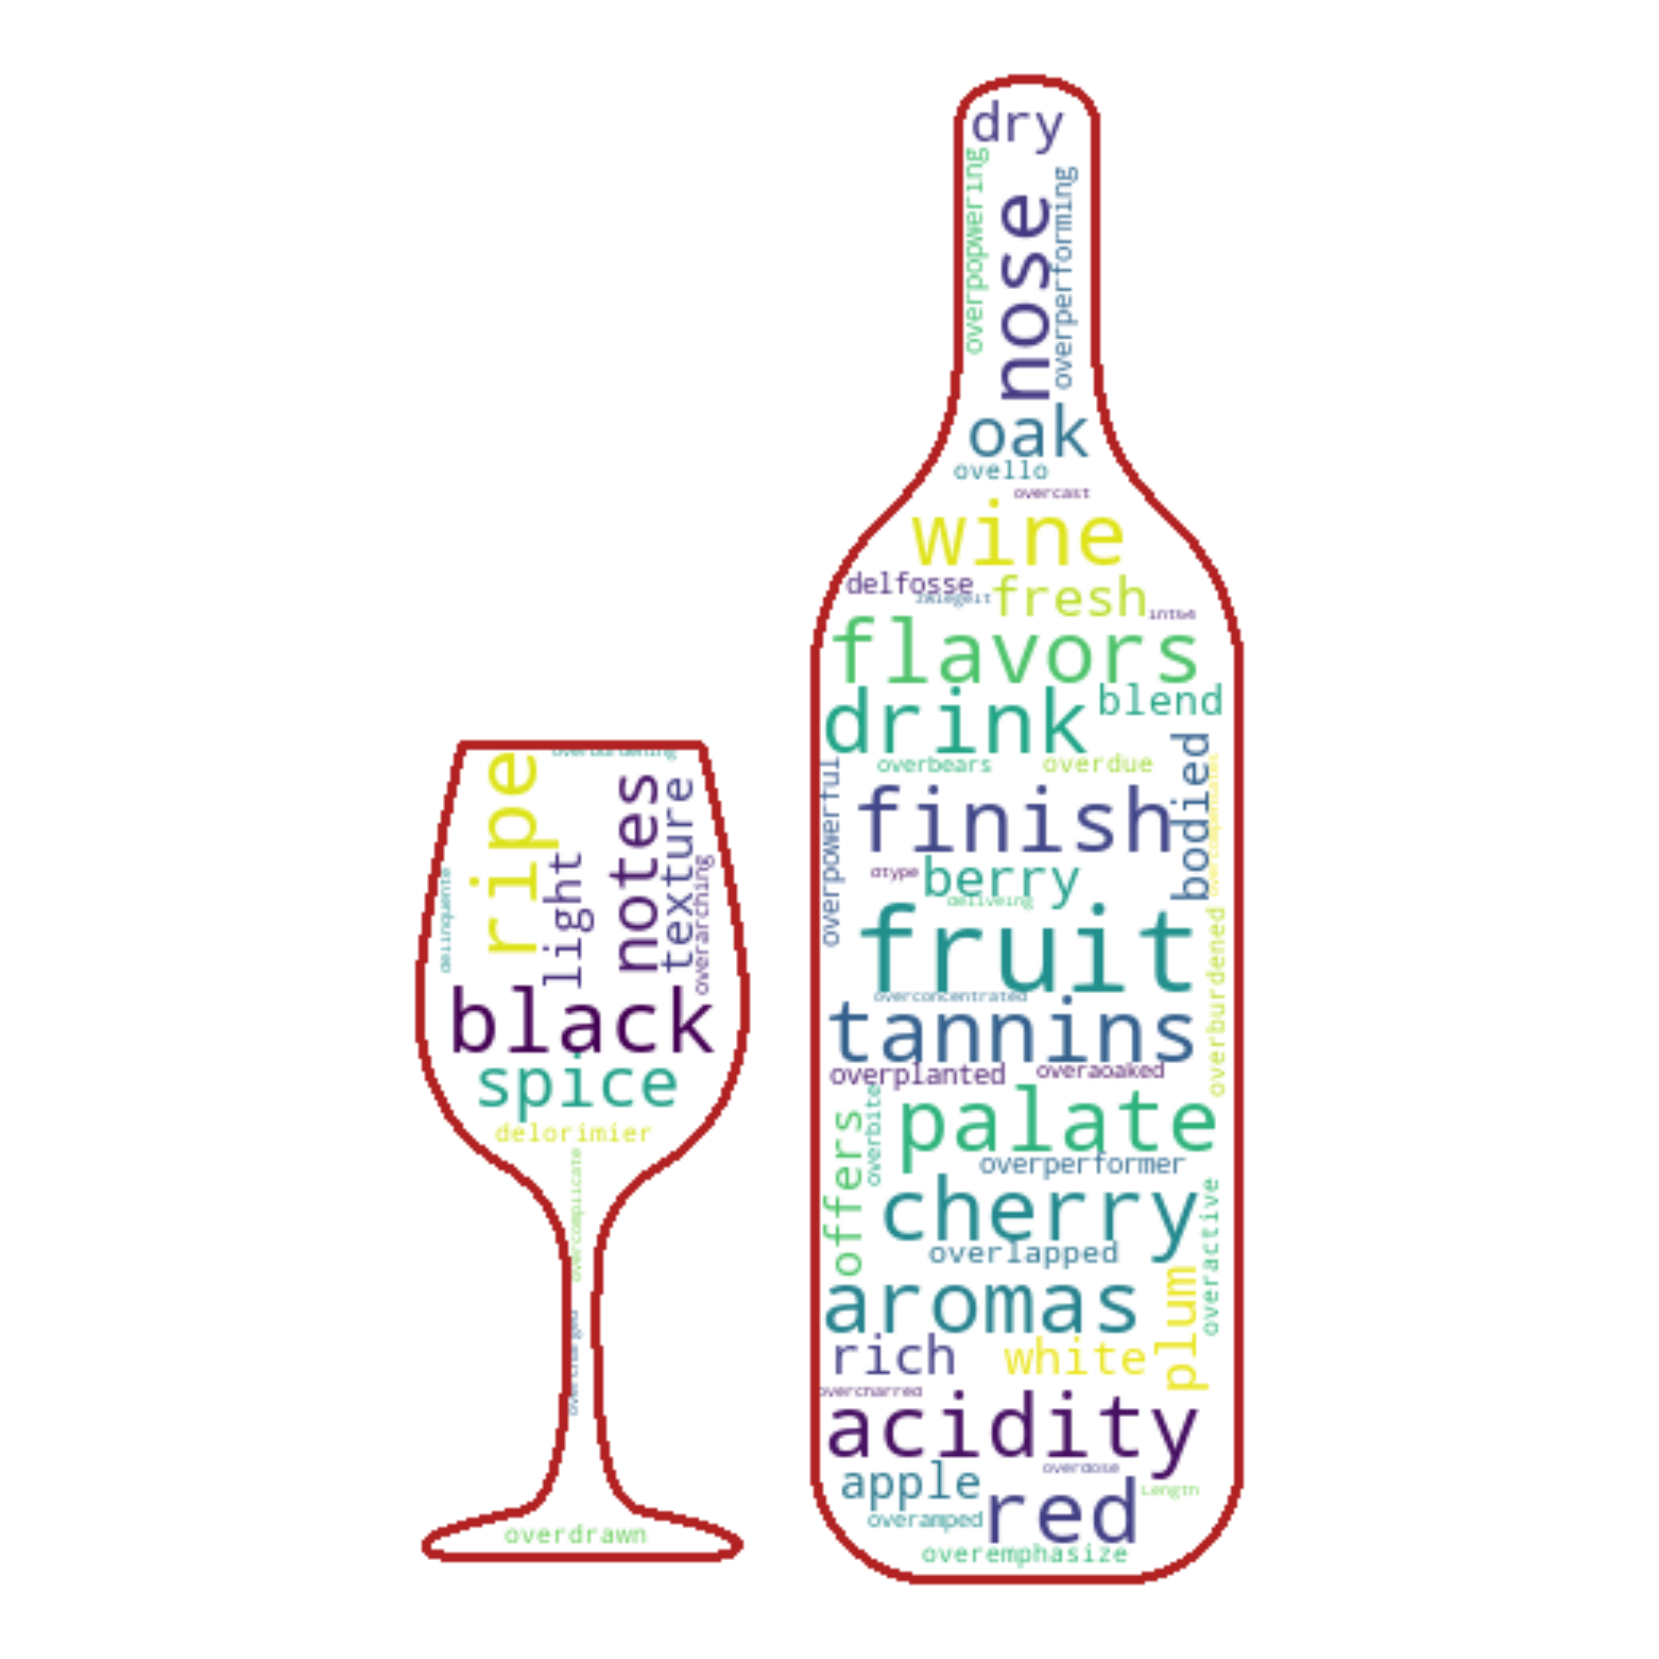

In [39]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(str(freq_words2))

# store to file
wc.to_file("./wine_mask_big.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

 After the EDA I realised that I could get better my models doing same improves in the data.:
- I have 804 different types of grapes, maybe I could group some of them.
- I would like to check if there are some mistakes in the spelling of some words in the description.
- I would like to reduce the number of countries and varieties, using only the most representatives.

The models I would like to use for this project will be:
-	CountVectoriazer
-	TfidfVectorizer
-	LogisticRegression
-	RandomForestClassifier
-	Native Bayes


And If I have time I will also use:
- SVM
-	KNeighborsClassifier
-	DecisionTreeClassifier
-	Word2Vect
-	ExtraTreesClassifier

I would like to use GridSearch to find the best parameters.

### BASELINE

In [40]:
print('The baselines of my features are:')
print('The country baseline is', vino.country.value_counts(normalize=True).max())
print('The variety baseline is', vino.variety.value_counts(normalize=True).max())
print('The province baseline is', vino.province.value_counts(normalize=True).max())

The baselines of my features are:
The country baseline is 0.4260024592868068
The variety baseline is 0.10805801482761103
The province baseline is 0.2374097267208906


The targets for my models will be the country, the variety and the province.

In [41]:
vino.to_csv('wine_conca.csv', index=False)